In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import holidays
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
import math
%matplotlib notebook

In [2]:
def exp_df(df, sep=1):
    global len_df 
    sh =  df.shape
    len_df = sh[0]
    if sep ==1:
        df.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp2','Z_CostContact', 'Z_Revenue', 'Response'],axis=1,inplace=True)
    if sep ==2:
        df.drop(['Dt_Customer'], axis=1, inplace=True)
        print("\n\n\n After cleaning Data \n\n")
    if sep ==3:
        print("\n\n\n After KNN imputation \n\n")
    
    print("Columns : ")
    display(pd.Series(df.columns))
    display(pd.DataFrame(df.head()))    
    print("Shape of Table ", sh)
    print(df.info())
    display(pd.DataFrame(df.describe().transpose()))
    print("\n the number of null \n", df.isnull().sum())
    if sep !=1:
        print("\n\nIncome column")
        flg, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
        sns.boxplot(ax = ax[0], x = df["Income"], palette="Set2")
        sns.histplot(ax = ax[1], x = df["Income"], kde=True, color="darkcyan")        

In [3]:
def exp_cat(df):
    global cat_list
    cat_list = ['Education', 'Marital_Status']
    
    for c in cat_list:
        vc =df[c].value_counts()
        print("\n\n data in {} \n {}".format(c, vc))
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
        
        sns.countplot(ax=ax[0], x = df[c], order =vc.index, palette="Set2")
        sns.countplot(ax=ax[1], x = df[c], order = vc.index, hue = df["AcceptedCmp1"], palette="Set2")
        ax[0].set_xticklabels(labels=list(vc.index), rotation = 45)
        ax[1].set_xticklabels(labels=list(vc.index), rotation = 45)
        plt.subplots_adjust(hspace = 0.4, wspace = 0.2, bottom=0.3)

In [4]:
def find_holiday(d):
    us_holidays = holidays.US()
    return int(d in us_holidays)

In [5]:
def find_Season(d):
    doy = d.timetuple().tm_yday
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)

    if doy in spring:
        season = 0
    elif doy in summer:
        season = 1
    elif doy in fall:
        season = 2
    else:
        season = 3
    return season

In [6]:
def con_date(df):
    
    df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])    
    df["Year"] = df["Dt_Customer"].apply(lambda x: x.year)
    df["Month"] = df["Dt_Customer"].apply(lambda x: x.month)
    df["Day"] = df["Dt_Customer"].apply(lambda x: x.day)
    df['Holiday'] = df['Dt_Customer'].apply(find_holiday)
    df['Season'] = df['Dt_Customer'].apply(find_Season)
    return df

In [7]:
def exp_cont(df):
    global conti_list
    conti_list = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',\
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', \
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',\
                  'Complain','Year', 'Month', 'Day', 'Holiday', 'Season']
    
    for c in conti_list:
        print("min of {} {}".format(c, min(df[c])))
        print("max of {} {}".format(c, max(df[c])))
        print("median of {} {}".format(c, max(df[c])))
        print("null values of {} {}".format(c, df[c].isnull().sum()))
        
        if c == "AcceptedCmp1":
            print("Values in {} : \n {}".format(c, df[c].value_counts()))            
            plt.figure(figsize = (4,4))
            sns.countplot(x =df[c])
            
        elif (c == "Kidhome") | (c== "Teenhome") | (c== "Complain"):
            print("Values in {} : \n {}".format(c, df[c].value_counts()))     
            flg, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
            sns.countplot(ax = ax[0], x = df[c], palette="Set2")
            sns.countplot(ax = ax[1], x =df[c], hue=df["AcceptedCmp1"], palette="Set2")          
            plt.subplots_adjust(hspace = 0.4, wspace = 0.2, bottom=0.3)
            
        elif (c == "Year") | (c== "Month") | (c== "Day") | (c== "Holiday") | (c== "Season"):
            vc = df[c].value_counts()
            print("Values in {} : \n {}".format(c, vc))     
            flg, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
            sns.countplot(ax = ax[0], x = df[c], palette="Set2", order= vc.index)
            sns.countplot(ax = ax[1], x =df[c], hue=df["AcceptedCmp1"], palette="Set2", order= vc.index)          
            plt.subplots_adjust(hspace = 0.4, wspace = 0.2, bottom=0.3)    
            ax[0].set_xticklabels(labels=list(vc.index), rotation = 90)
            ax[1].set_xticklabels(labels=list(vc.index), rotation = 90)
            
    
        else : 
            flg, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
            sns.boxplot(ax = ax[0], x = df[c], palette="Set2")
            sns.histplot(ax = ax[1], x = df[c], color="darkcyan")
            ax2 = ax[1].twinx()
            sns.kdeplot(x= df[c], hue=df["AcceptedCmp1"],  ax=ax2)
            plt.subplots_adjust(hspace = 0.4, wspace = 0.2, bottom=0.3)
          

In [8]:
def clean_data(df):
    df.loc[df["Income"]>500000,"Income"] = np.nan
    return df

In [9]:
def labels_to_df(dic):
    print('\n#### Labels for encoding \n')
    for i in dic.keys():        
        df_name = i        
        df_name = pd.DataFrame.from_dict([dic[i]])        
        df_name.rename(index={0:i}, inplace=True)        
        if df_name.shape[1] >21:
            display(df_name.iloc[:,:15])
            display(df_name.iloc[:,15:31])
            display(df_name.iloc[:,31:])
        else: 
            display(df_name)
        print("\n") 

In [10]:
def encode_cat(df_t, c_list):
    df = df_t.copy()
    global dic_labels
    dic_labels ={}
    le = LabelEncoder()
    
    for s in c_list:
        dic_labels[s] = {}
        df[s] = le.fit_transform(df[s])      
        dic_label = dict(zip(le.classes_, le.transform(le.classes_)))
        dic_labels[s] = dic_label
    return df, dic_labels

In [11]:
def Knn_imp(df):
    df, dic_labels = encode_cat(df, cat_list)
    labels_to_df(dic_labels)
    imputer = KNNImputer(n_neighbors=3)
    imputed_df= pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    imputed_df.names = "After KNN Imputation"
    return imputed_df

In [12]:
def ch_corr(df):
    plt.figure(figsize=(20,20))
    m = np.triu(np.ones_like(df.corr(), dtype=bool))
    sns.heatmap(df.corr(),mask=m, annot=True, cmap='BrBG')
    plt.savefig('corr.png')

In [13]:
def train_test_scal(df, sep=0):
    
    X = df.drop(["AcceptedCmp1"], axis=1)
    y = df["AcceptedCmp1"]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1, stratify=y)   

    if sep == 1:
        scaler = MinMaxScaler(feature_range=(0,1))
        X_train = pd.DataFrame(scaler.fit_transform(X_train),index =X_train.index, columns = X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test),index =X_test.index, columns = X_test.columns)
    
    print("\n\nshape of Datasets\n")
    print("X_train.shape, X_test.shape", X_train.shape, X_test.shape)
    print("y_train.shape, y_test.shape", y_train.shape, y_test.shape, "\n")
    print("Value_counts in y_train and y_test")
    print(y_train.value_counts())
    print(y_test.value_counts())
    
    return X_train, X_test, y_train, y_test

In [14]:
'''def cal_log_sk(model):
    coef_df["exp"] = coef_df[0].apply(lambda x : math.exp(x))
    return coef_df'''

'def cal_log_sk(model):\n    coef_df["exp"] = coef_df[0].apply(lambda x : math.exp(x))\n    return coef_df'

In [104]:
'''def model_sklog(X_train, y_train):
    X_train, X_test, y_train, y_test = train_test_scal(imputed_df, 0)
    logistic_regression= LogisticRegression()
    model=logistic_regression.fit(X_train,y_train)
    
    coef_dict={}
    for coef, feat in zip(model.coef_[0,:],X_train.columns):
        coef_dict[feat] = coef
    coef_df = pd.DataFrame(coef_dict, index = [0])
    coef_df = coef_df.transpose()
    return model, coef_dict'''

In [14]:
def model_log(X_train, y_train):
    X_train= sm.add_constant(X_train)
    log_reg = sm.Logit(y_train, X_train).fit()
    print(log_reg.summary())
    return log_reg

In [15]:
def model_svm(X_train, y_train):
    svm_model = svm.SVC(kernel='linear') 
    svm_model.fit(X_train, y_train)

In [16]:
def cal_log(model):
    a = model.params
    for coe in a.index:
        print("[{}]      exp({}) is {}".format(coe, a[coe],round(math.exp(a[coe]),6)))

In [17]:
def evaluate_models(X_train, X_test, y_test, model, sep =1, th =0.5):
    
     
    threshold = th
    
    X_test = X_test.copy()
    if (sep == 1):
        
        pred = np.array(model.predict(X_test) > threshold, dtype=float)
        data = {'y_test': y_test, 'pred': pred}
        df = pd.DataFrame(data)
        confusion_mat = pd.crosstab(df['pred'], df['y_test'], rownames=['Predicted'], colnames=['Actual'])
        plt.figure(figsize=(5,4))
        sns.heatmap(confusion_mat, annot=True, fmt='g')
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred)
        recall = recall_score(y_test, pred)
        print("accuracy", accuracy)
        print("precision", precision)
        print("recall",recall) 
        

        
    else:
        for kernel in ('linear','poly', 'rbf'):
            svm_mo = svm.SVC(kernel=kernel)
            svm_mo.fit(X_train, y_train)
            pred = svm_mo.predict(X_test)
            disp = ConfusionMatrixDisplay.from_estimator(
            svm_mo,
            X_test,
            y_test,
            display_labels=['0','1'],
            cmap=plt.cm.Blues,
            )
            plt.show()
            print(disp.confusion_matrix)
            accuracy = accuracy_score(y_test, pred)
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)
            print("accuracy", accuracy)
            print("precision", precision)
            print("recall",recall)    

In [18]:
def backward_sel(X_train, X_test, y_train, y_test, d_list):
    
    d_list = d_list
    i=1
    X_test= sm.add_constant(X_test)
    
    for d in d_list:
        print("\n\n\neleiminating ", d_list[:i], "\n\n")
    
        X_train.drop(d, axis =1, inplace=True)
        log_reg = model_log(X_train, y_train)
        X_test.drop(d, axis =1, inplace=True)    
        evaluate_models(X_train, X_test, y_test, log_reg, sep =1)
        i+=1
    return log_reg, X_train, X_test, y_test 

Columns : 


0              Year_Birth
1               Education
2          Marital_Status
3                  Income
4                 Kidhome
5                Teenhome
6             Dt_Customer
7                 Recency
8                MntWines
9               MntFruits
10        MntMeatProducts
11        MntFishProducts
12       MntSweetProducts
13           MntGoldProds
14      NumDealsPurchases
15        NumWebPurchases
16    NumCatalogPurchases
17      NumStorePurchases
18      NumWebVisitsMonth
19           AcceptedCmp1
20               Complain
dtype: object

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  MntFishProducts  \
0  2012-09-04       58       635         88  ...              172   
1  2014-03-08       38        11          1  ...                2   
2  2013-08-21       26       426         49  ...              111   
3  2014-02-10       26        11          4  ...               10   
4  2014-01-19       94       173         43  ...               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   Complain  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 21 columns]

Shape of Table  (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurch

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp1             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0


 the number of null 
 Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
Complain                0
dtype: int64


 data in Education 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


<IPython.core.display.Javascript object>


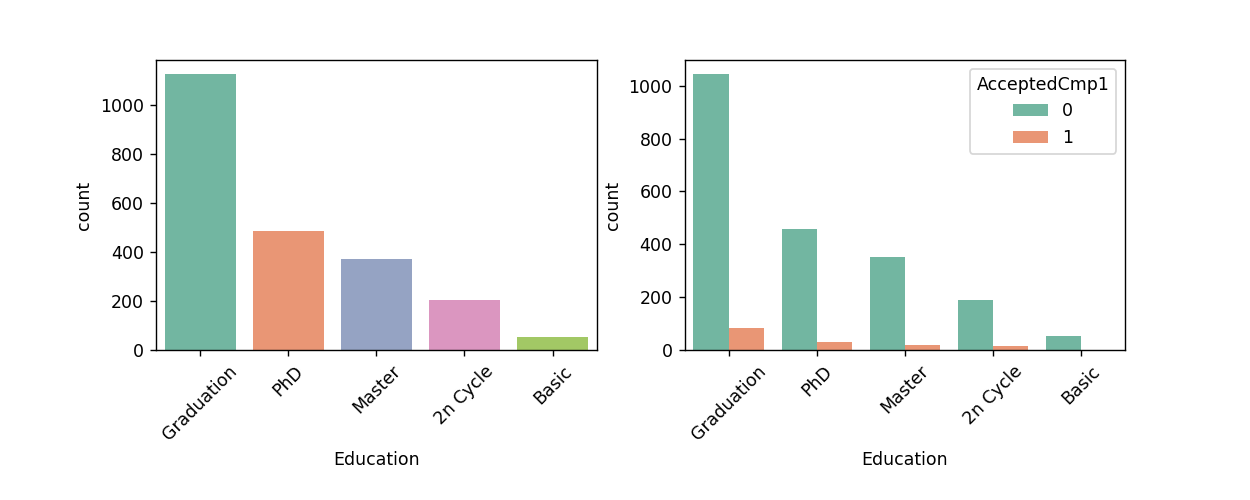



 data in Marital_Status 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


<IPython.core.display.Javascript object>


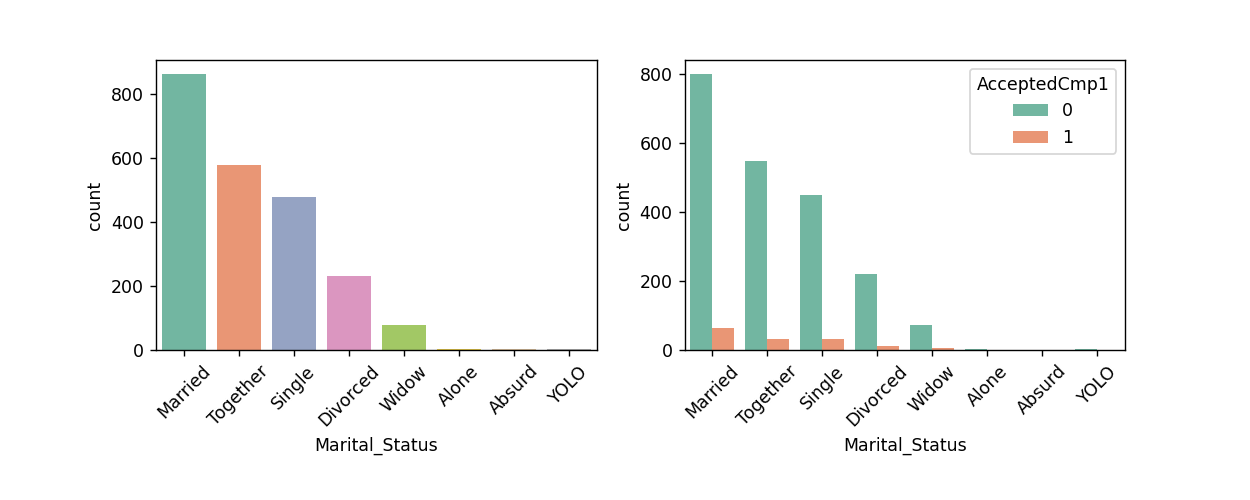

min of Year_Birth 1893
max of Year_Birth 1996
median of Year_Birth 1996
null values of Year_Birth 0


<IPython.core.display.Javascript object>


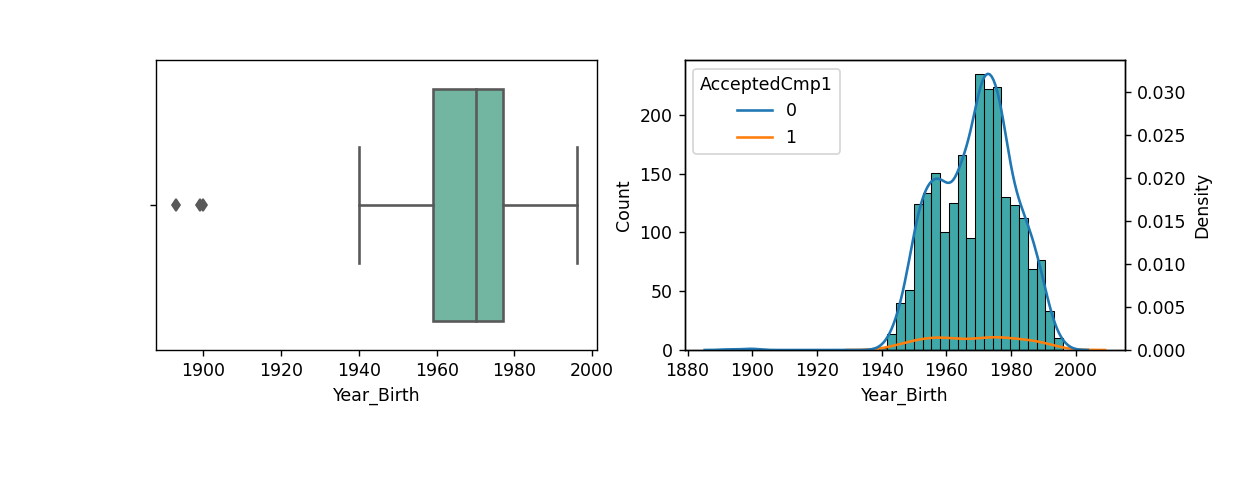

min of Income 1730.0
max of Income 666666.0
median of Income 666666.0
null values of Income 24


<IPython.core.display.Javascript object>


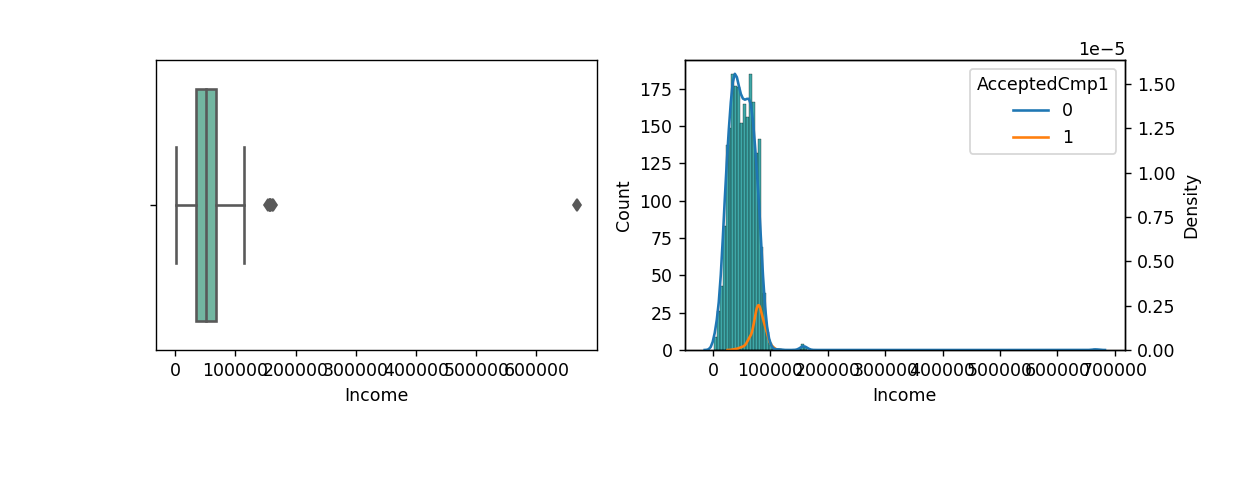

min of Kidhome 0
max of Kidhome 2
median of Kidhome 2
null values of Kidhome 0
Values in Kidhome : 
 0    1293
1     899
2      48
Name: Kidhome, dtype: int64


<IPython.core.display.Javascript object>


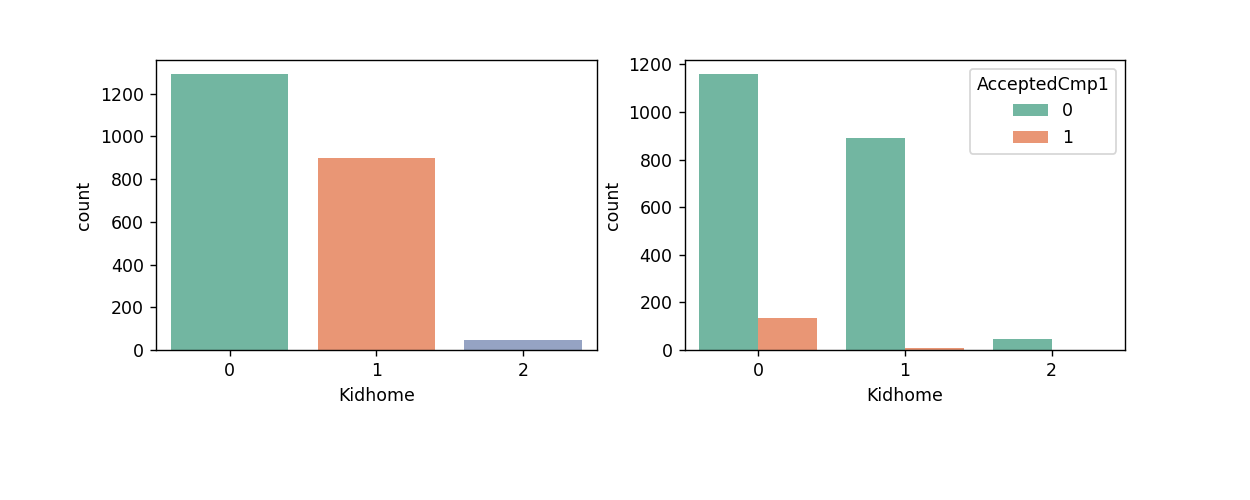

min of Teenhome 0
max of Teenhome 2
median of Teenhome 2
null values of Teenhome 0
Values in Teenhome : 
 0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


<IPython.core.display.Javascript object>


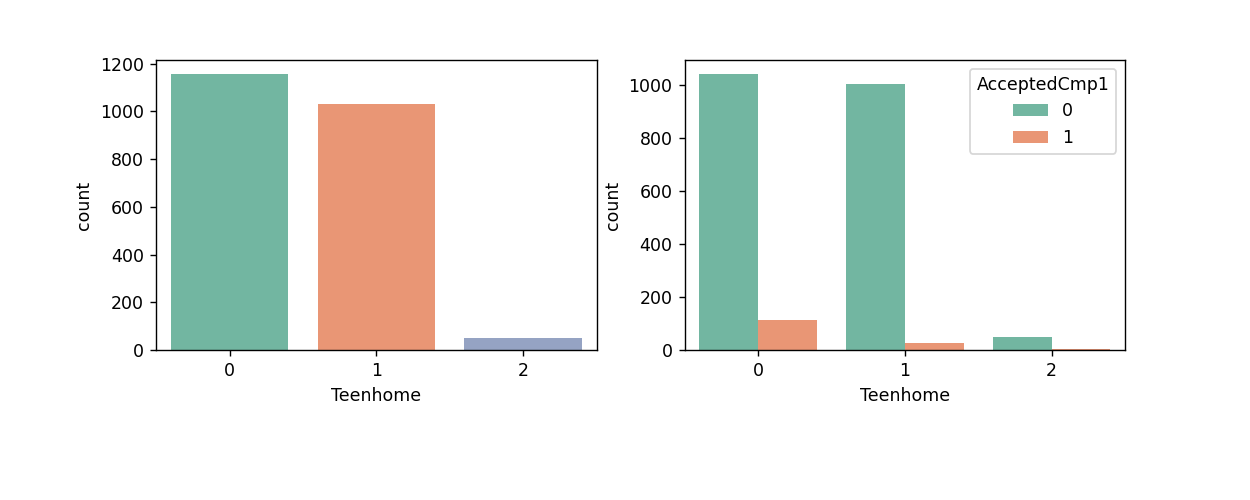

min of Recency 0
max of Recency 99
median of Recency 99
null values of Recency 0


<IPython.core.display.Javascript object>


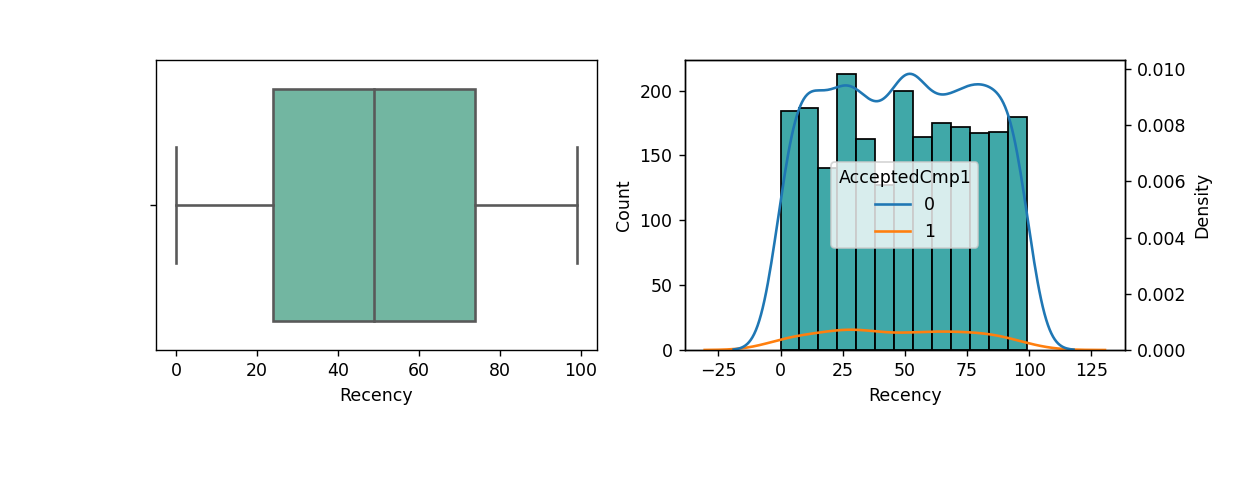

min of MntWines 0
max of MntWines 1493
median of MntWines 1493
null values of MntWines 0


<IPython.core.display.Javascript object>


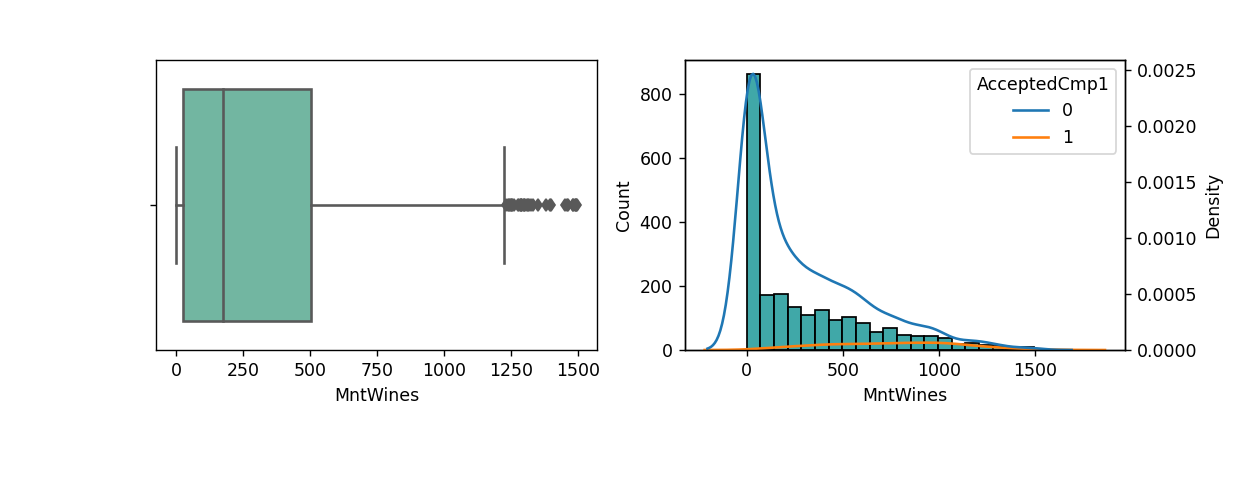

min of MntFruits 0
max of MntFruits 199
median of MntFruits 199
null values of MntFruits 0


<IPython.core.display.Javascript object>


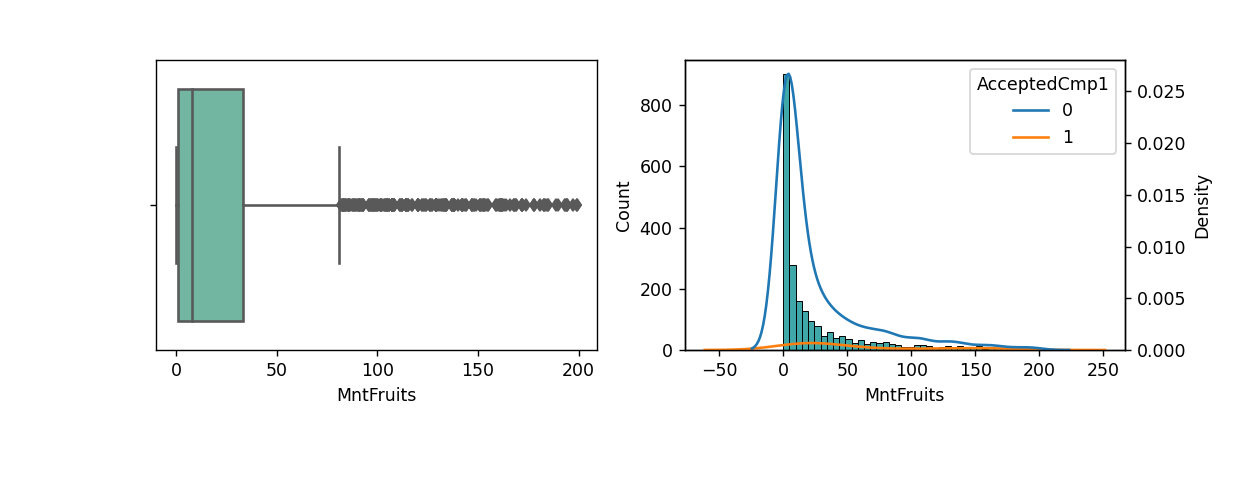

min of MntMeatProducts 0
max of MntMeatProducts 1725
median of MntMeatProducts 1725
null values of MntMeatProducts 0


<IPython.core.display.Javascript object>


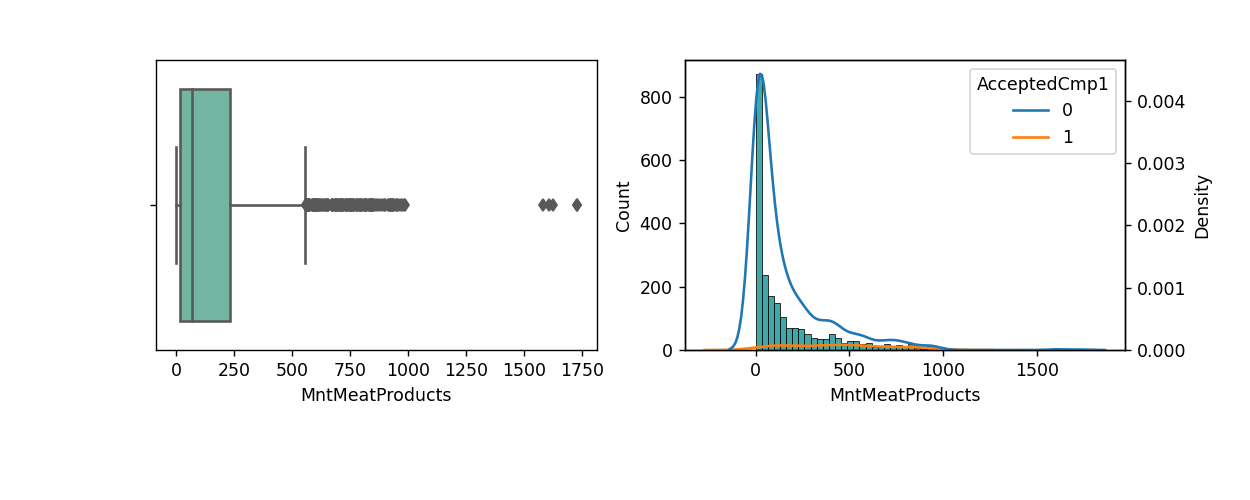

min of MntFishProducts 0
max of MntFishProducts 259
median of MntFishProducts 259
null values of MntFishProducts 0


<IPython.core.display.Javascript object>


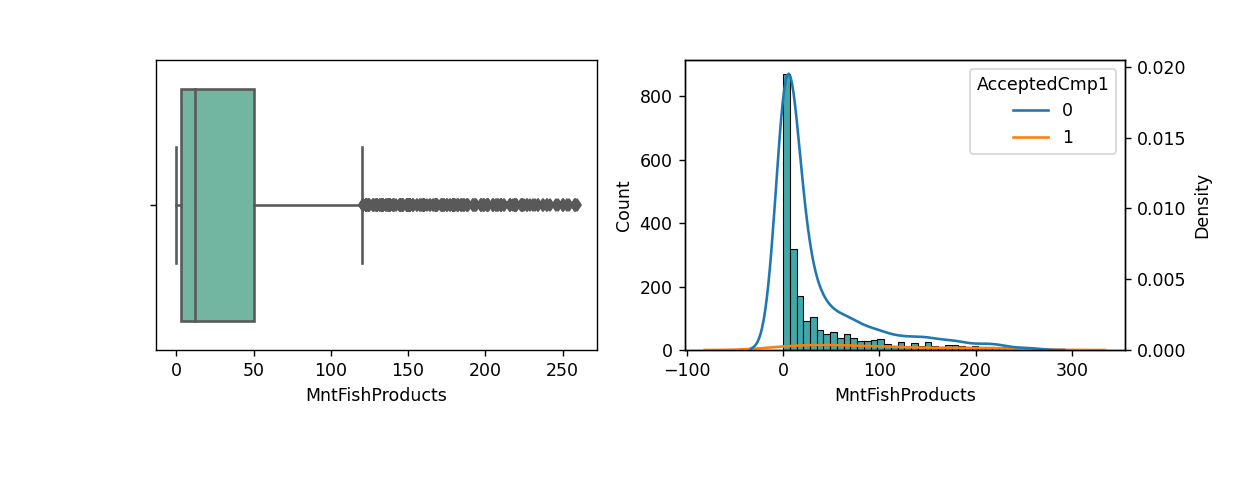

min of MntSweetProducts 0
max of MntSweetProducts 263
median of MntSweetProducts 263
null values of MntSweetProducts 0


<IPython.core.display.Javascript object>


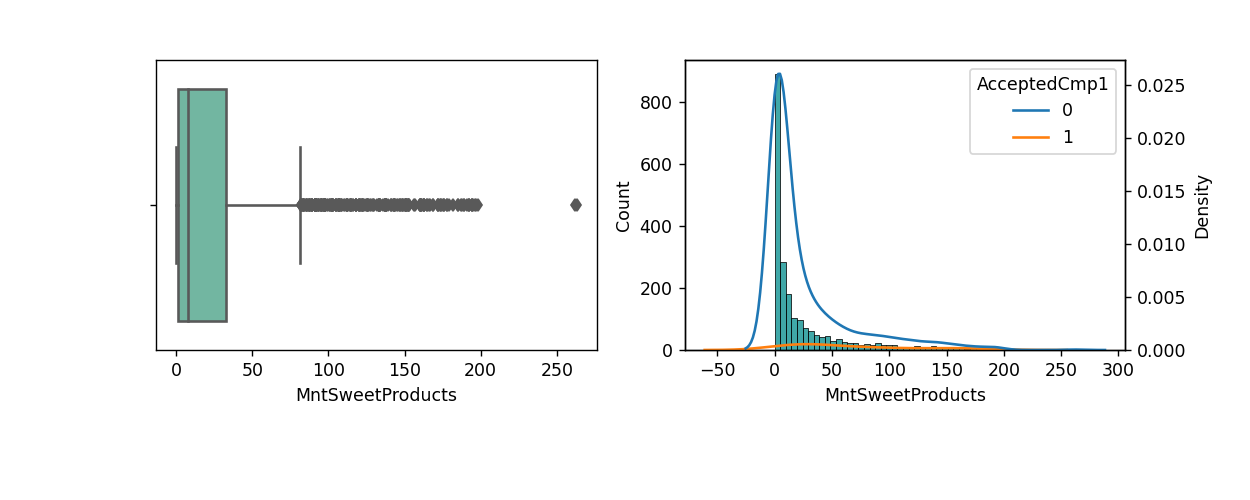

min of MntGoldProds 0
max of MntGoldProds 362
median of MntGoldProds 362
null values of MntGoldProds 0


<IPython.core.display.Javascript object>


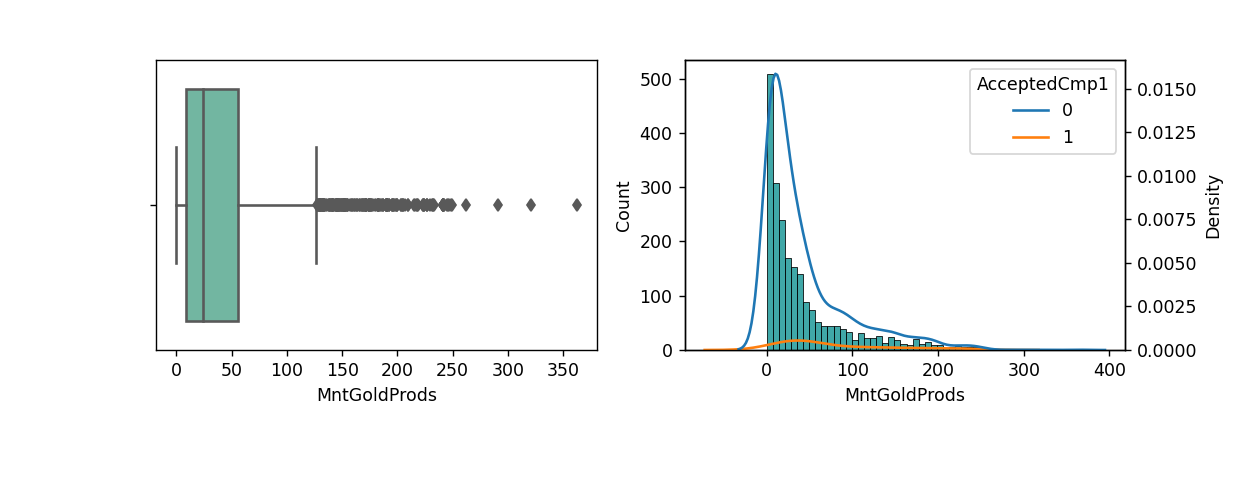

min of NumDealsPurchases 0
max of NumDealsPurchases 15
median of NumDealsPurchases 15
null values of NumDealsPurchases 0


<IPython.core.display.Javascript object>


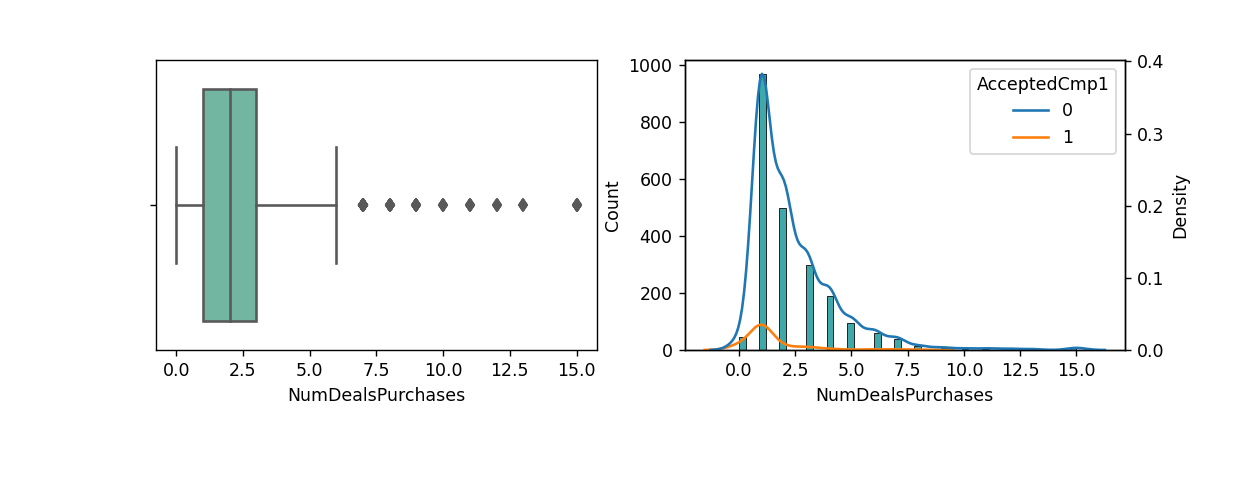

min of NumWebPurchases 0
max of NumWebPurchases 27
median of NumWebPurchases 27
null values of NumWebPurchases 0


<IPython.core.display.Javascript object>


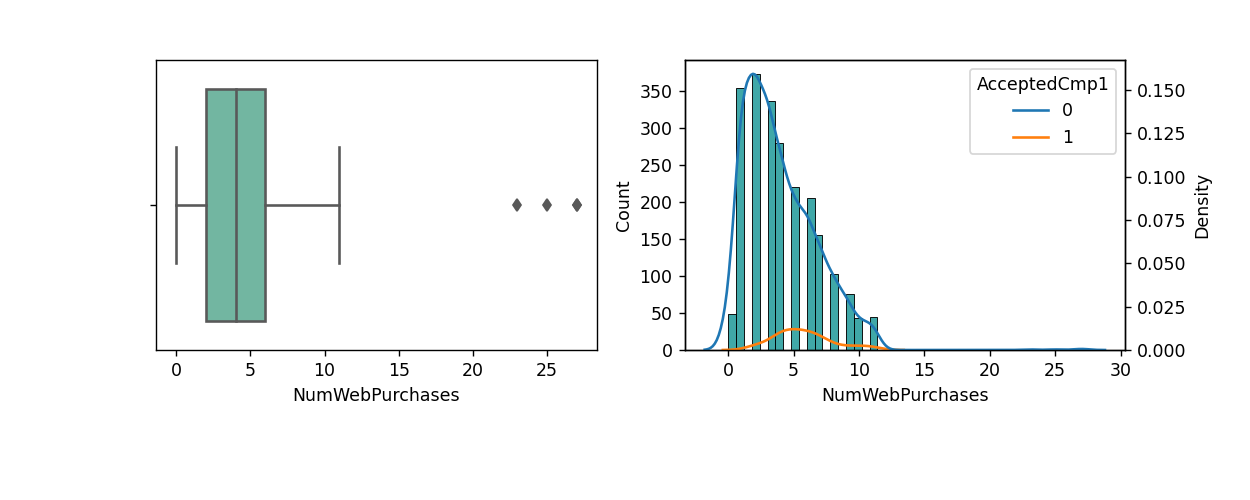

min of NumCatalogPurchases 0
max of NumCatalogPurchases 28
median of NumCatalogPurchases 28
null values of NumCatalogPurchases 0


<IPython.core.display.Javascript object>


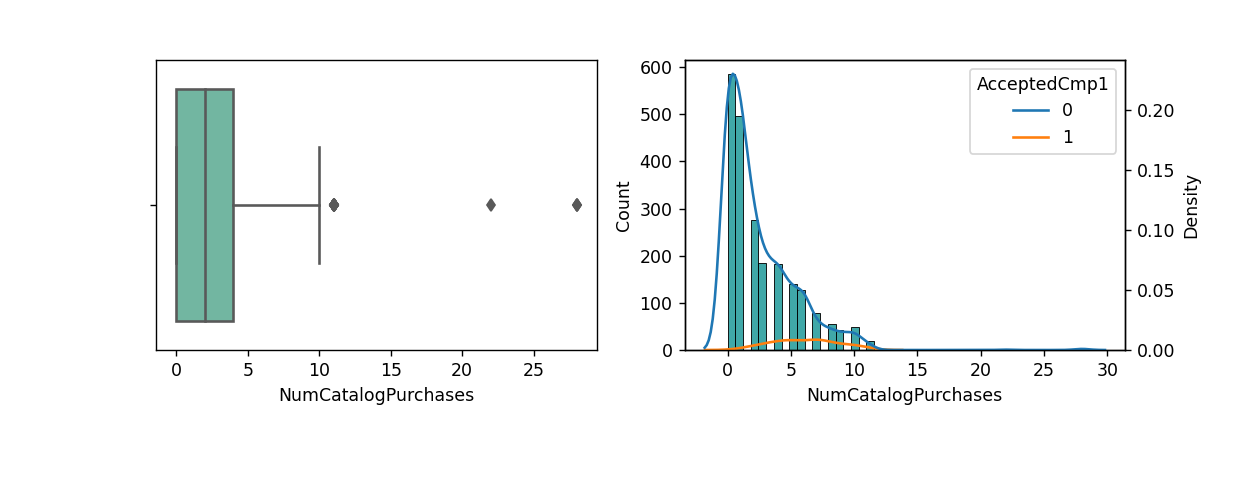

min of NumStorePurchases 0
max of NumStorePurchases 13
median of NumStorePurchases 13
null values of NumStorePurchases 0


<IPython.core.display.Javascript object>


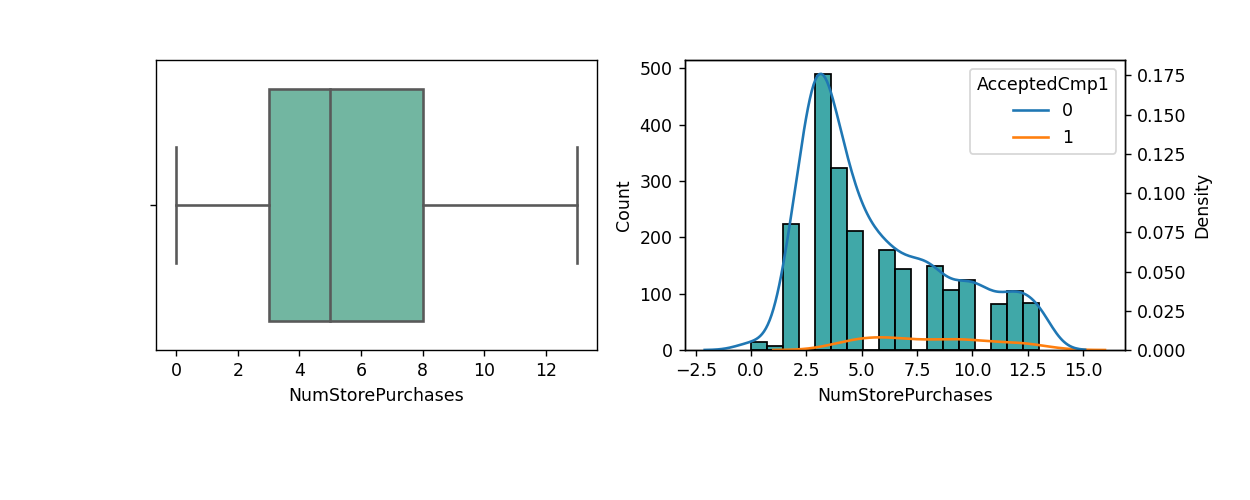

min of NumWebVisitsMonth 0
max of NumWebVisitsMonth 20
median of NumWebVisitsMonth 20
null values of NumWebVisitsMonth 0


<IPython.core.display.Javascript object>


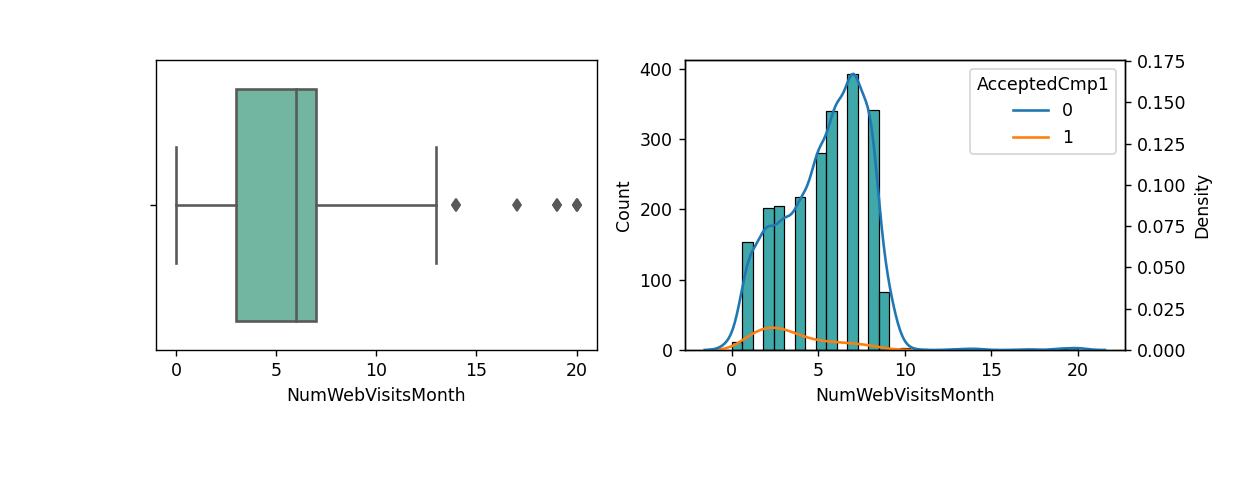

min of AcceptedCmp1 0
max of AcceptedCmp1 1
median of AcceptedCmp1 1
null values of AcceptedCmp1 0
Values in AcceptedCmp1 : 
 0    2096
1     144
Name: AcceptedCmp1, dtype: int64


<IPython.core.display.Javascript object>


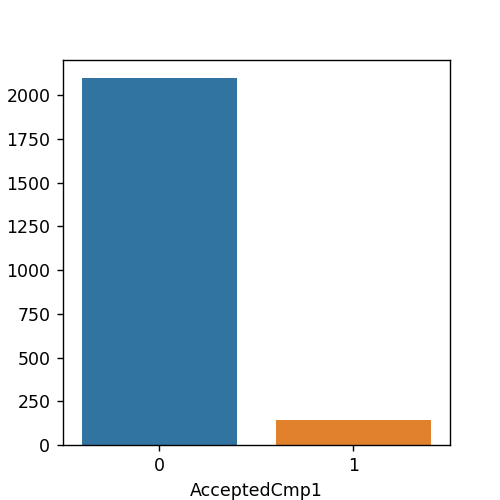

min of Complain 0
max of Complain 1
median of Complain 1
null values of Complain 0
Values in Complain : 
 0    2219
1      21
Name: Complain, dtype: int64


<IPython.core.display.Javascript object>


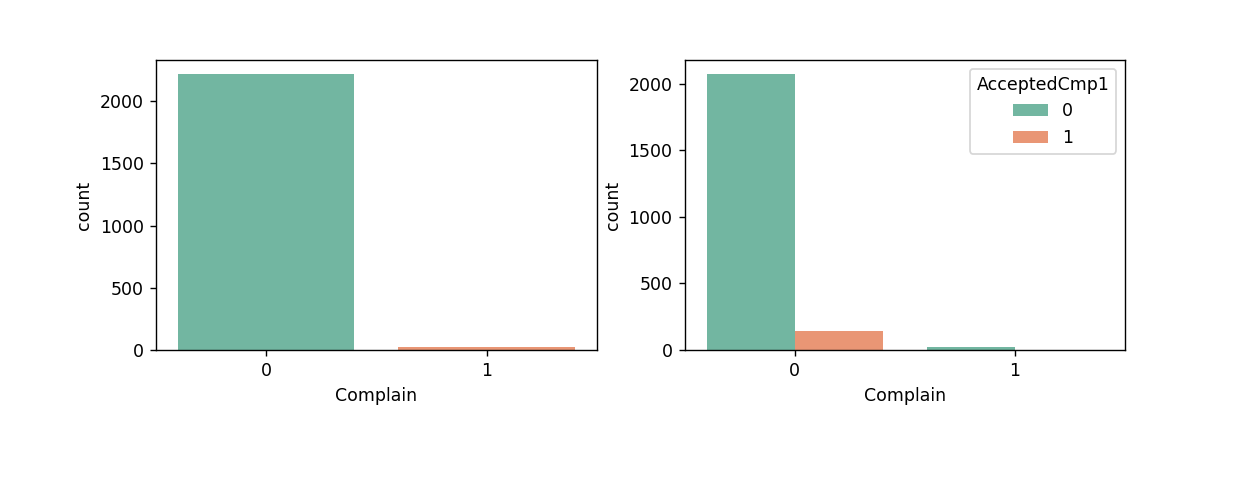

min of Year 2012
max of Year 2014
median of Year 2014
null values of Year 0
Values in Year : 
 2013    1189
2014     557
2012     494
Name: Year, dtype: int64


C:\Users\singg\AppData\Local\Temp\ipykernel_14744\1419591990.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  flg, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))


<IPython.core.display.Javascript object>


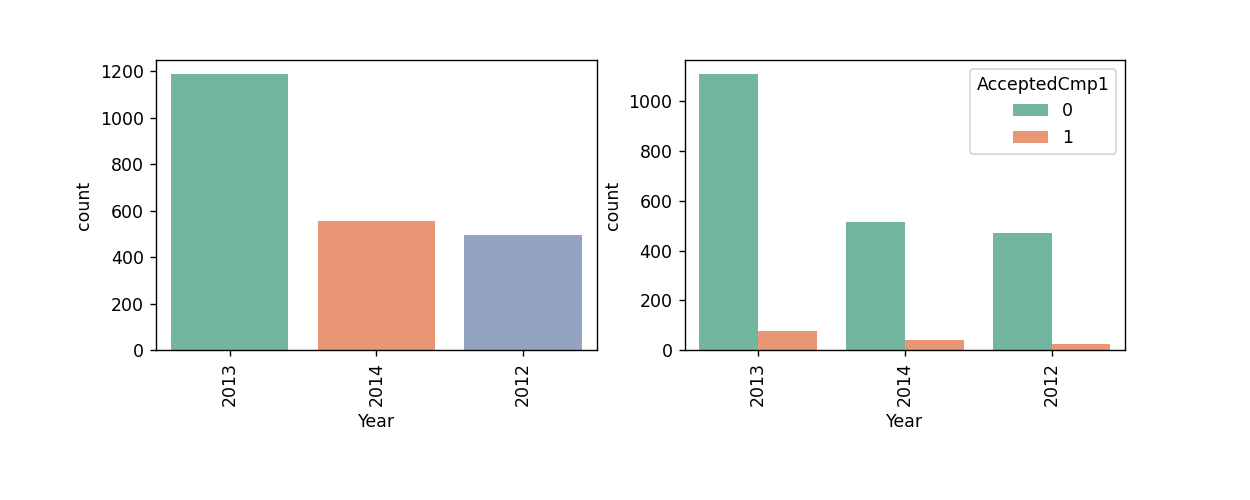

min of Month 1
max of Month 12
median of Month 12
null values of Month 0
Values in Month : 
 8     222
5     216
10    212
3     211
1     197
9     193
11    187
4     182
2     178
12    175
6     166
7     101
Name: Month, dtype: int64


<IPython.core.display.Javascript object>


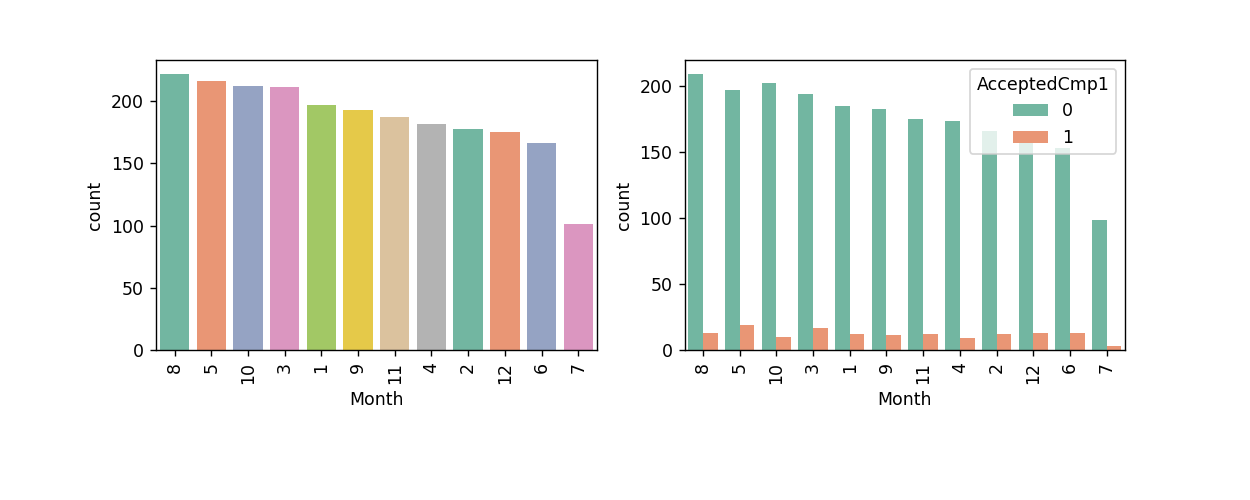

min of Day 1
max of Day 31
median of Day 31
null values of Day 0
Values in Day : 
 12    103
17     91
22     89
23     89
11     83
7      83
29     82
10     79
18     78
2      78
3      75
5      75
1      74
28     74
20     73
25     73
16     71
4      71
8      71
13     69
19     69
6      65
21     62
26     61
24     60
15     60
9      59
30     59
14     58
27     56
31     50
Name: Day, dtype: int64


<IPython.core.display.Javascript object>


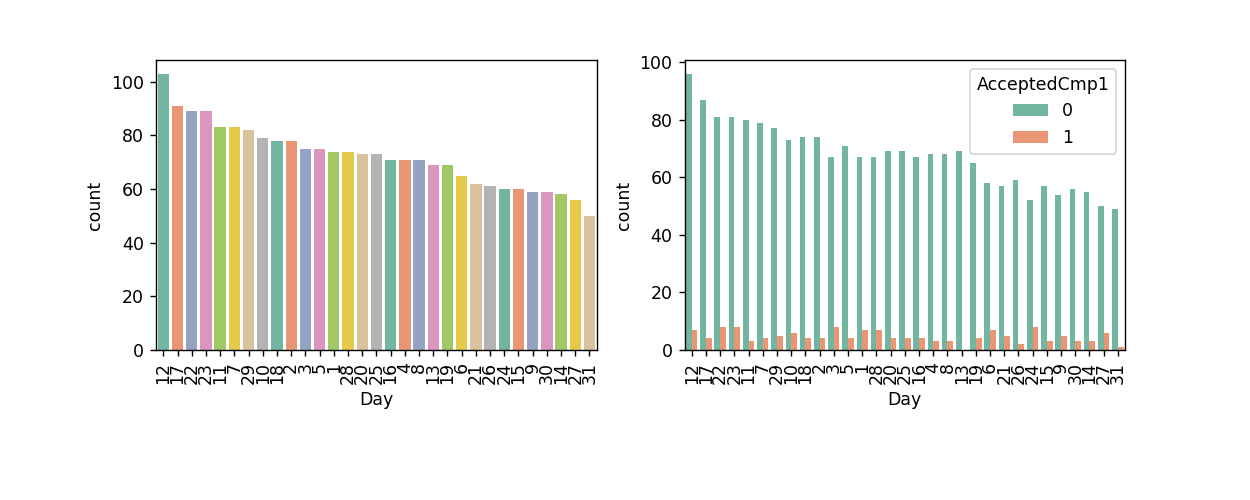

min of Holiday 0
max of Holiday 1
median of Holiday 1
null values of Holiday 0
Values in Holiday : 
 0    2182
1      58
Name: Holiday, dtype: int64


<IPython.core.display.Javascript object>


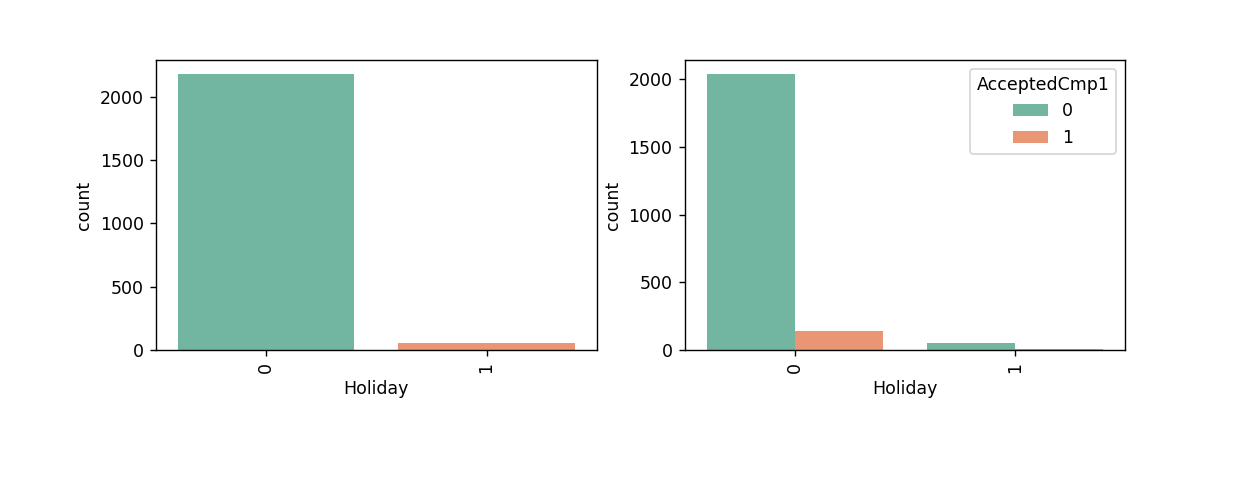

min of Season 0
max of Season 3
median of Season 3
null values of Season 0
Values in Season : 
 0    587
2    571
3    570
1    512
Name: Season, dtype: int64


<IPython.core.display.Javascript object>


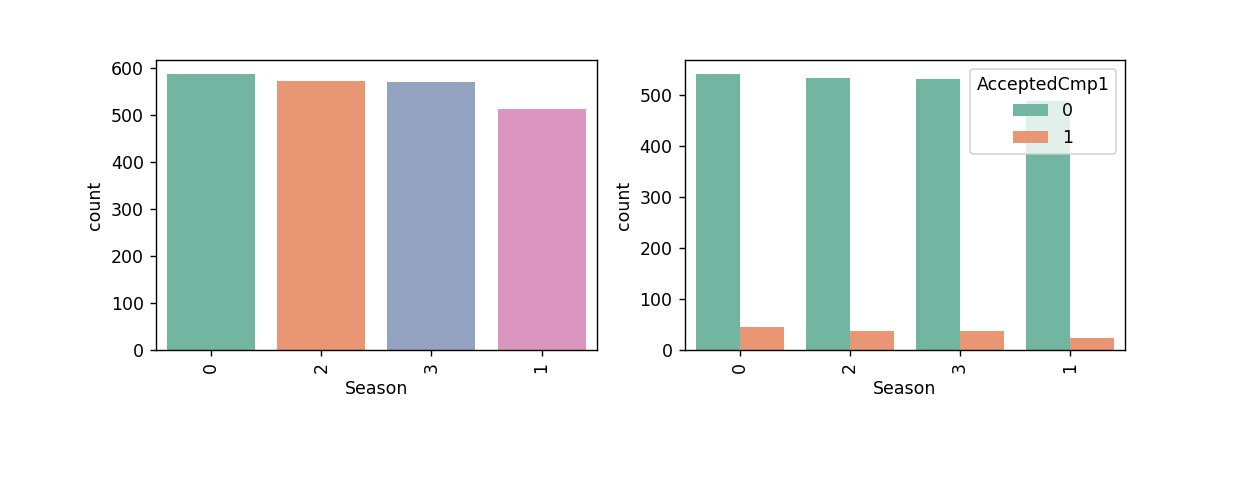




 After cleaning Data 


Columns : 


0              Year_Birth
1               Education
2          Marital_Status
3                  Income
4                 Kidhome
5                Teenhome
6                 Recency
7                MntWines
8               MntFruits
9         MntMeatProducts
10        MntFishProducts
11       MntSweetProducts
12           MntGoldProds
13      NumDealsPurchases
14        NumWebPurchases
15    NumCatalogPurchases
16      NumStorePurchases
17      NumWebVisitsMonth
18           AcceptedCmp1
19               Complain
20                   Year
21                  Month
22                    Day
23                Holiday
24                 Season
dtype: object

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation       Together  71613.0        0         0       26   
3        1984  Graduation       Together  26646.0        1         0       26   
4        1981         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0       635         88              546  ...                   10   
1        11          1                6  ...                    1   
2       426         49              127  ...                    2   
3        11          4               20  ...                    0   
4       173         43              118  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  Complain  Year  Month  \
0                  4                  7             0         0  2012      9   
1                  2                  5             0         0  2014      3   
2                 10                  4             0         0  2013      8   
3                  4                  6             0         0  2014      2   
4                  6                  5             0         0  2014      1   

   Day  Holiday  Season  
0    4        0       1  
1    8        0       3  
2   21        0       1  
3   10        0       3  
4   19        0       3  

[5 rows x 25 columns]

Shape of Table  (2240, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2215 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogP

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2215.0  51969.861400  21526.320095  1730.0  35284.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Year                 2240.0   2013.028125      0.684554  2012.0   2013.00   
Month                2240.0      6.467411      3.486695     1.0      3.00   
Day                  2240.0     15.638393      8.790680     1.0      8.00   
Holiday              2240.0      0.025893      0.158851     0.0      0.00   
Season               2240.0      1.501786      1.132963     0.0      0.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51373.0  68487.00  162397.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp1             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Year                  2013.0   2013.00    2014.0  
Month                    6.0     10.00      12.0  
Day                     16.0     23.00      31.0  
Holiday                  0.0      0.00       1.0  
Season                   2.0      3.00       3.0


 the number of null 
 Year_Birth              0
Education               0
Marital_Status          0
Income                 25
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
Complain                0
Year                    0
Month                   0
Day                     0
Holiday                 0
Season                  0
dtype: int64


Income column


<IPython.core.display.Javascript object>


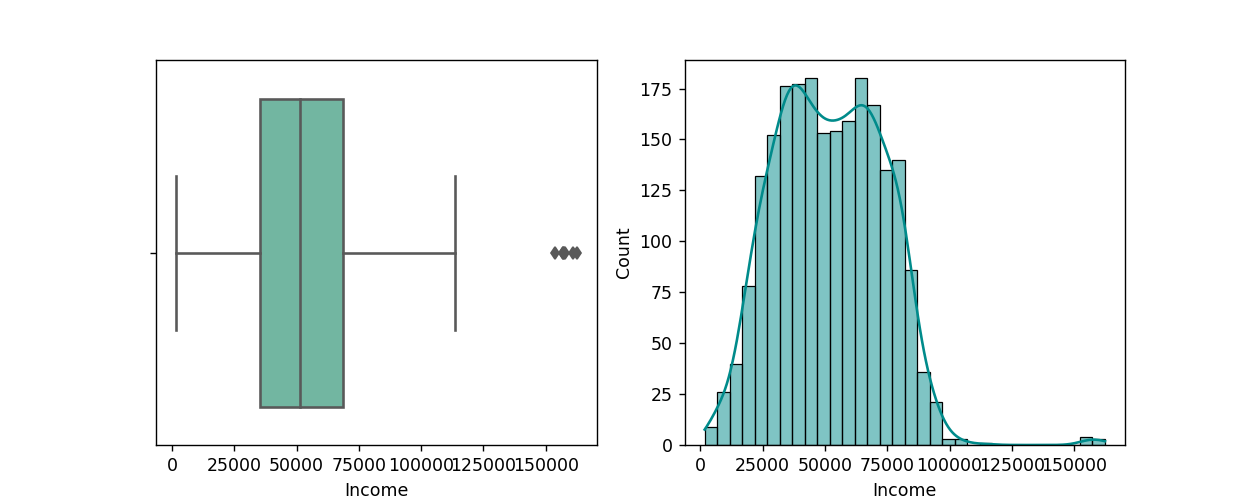


#### Labels for encoding 



2n Cycle  Basic  Graduation  Master  PhD
Education         0      1           2       3    4

Absurd  Alone  Divorced  Married  Single  Together  Widow  \
Marital_Status       0      1         2        3       4         5      6   

                YOLO  
Marital_Status     7






 After KNN imputation 


Columns : 


0              Year_Birth
1               Education
2          Marital_Status
3                  Income
4                 Kidhome
5                Teenhome
6                 Recency
7                MntWines
8               MntFruits
9         MntMeatProducts
10        MntFishProducts
11       MntSweetProducts
12           MntGoldProds
13      NumDealsPurchases
14        NumWebPurchases
15    NumCatalogPurchases
16      NumStorePurchases
17      NumWebVisitsMonth
18           AcceptedCmp1
19               Complain
20                   Year
21                  Month
22                    Day
23                Holiday
24                 Season
dtype: object

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0      1957.0        2.0             4.0  58138.0      0.0       0.0     58.0   
1      1954.0        2.0             4.0  46344.0      1.0       1.0     38.0   
2      1965.0        2.0             5.0  71613.0      0.0       0.0     26.0   
3      1984.0        2.0             5.0  26646.0      1.0       0.0     26.0   
4      1981.0        4.0             3.0  58293.0      1.0       0.0     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0     635.0       88.0            546.0  ...                 10.0   
1      11.0        1.0              6.0  ...                  1.0   
2     426.0       49.0            127.0  ...                  2.0   
3      11.0        4.0             20.0  ...                  0.0   
4     173.0       43.0            118.0  ...                  3.0   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  Complain    Year  \
0                4.0                7.0           0.0       0.0  2012.0   
1                2.0                5.0           0.0       0.0  2014.0   
2               10.0                4.0           0.0       0.0  2013.0   
3                4.0                6.0           0.0       0.0  2014.0   
4                6.0                5.0           0.0       0.0  2014.0   

   Month   Day  Holiday  Season  
0    9.0   4.0      0.0     1.0  
1    3.0   8.0      0.0     3.0  
2    8.0  21.0      0.0     1.0  
3    2.0  10.0      0.0     3.0  
4    1.0  19.0      0.0     3.0  

[5 rows x 25 columns]

Shape of Table  (2240, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   float64
 1   Education            2240 non-null   float64
 2   Marital_Status       2240 non-null   float64
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   float64
 5   Teenhome             2240 non-null   float64
 6   Recency              2240 non-null   float64
 7   MntWines             2240 non-null   float64
 8   MntFruits            2240 non-null   float64
 9   MntMeatProducts      2240 non-null   float64
 10  MntFishProducts      2240 non-null   float64
 11  MntSweetProducts     2240 non-null   float64
 12  MntGoldProds         2240 non-null   float64
 13  NumDealsPurchases    2240 non-null   float64
 14  NumWebPurchases      2240 non-null   float64
 15  NumCatalogP

count          mean           std     min           25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.000000   
Education            2240.0      2.393750      1.124797     0.0      2.000000   
Marital_Status       2240.0      3.729911      1.076277     0.0      3.000000   
Income               2240.0  51930.501488  21506.961848  1730.0  35241.666667   
Kidhome              2240.0      0.444196      0.538398     0.0      0.000000   
Teenhome             2240.0      0.506250      0.544538     0.0      0.000000   
Recency              2240.0     49.109375     28.962453     0.0     24.000000   
MntWines             2240.0    303.935714    336.597393     0.0     23.750000   
MntFruits            2240.0     26.302232     39.773434     0.0      1.000000   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.000000   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.000000   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.000000   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.000000   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.000000   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.000000   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.000000   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.000000   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.000000   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.000000   
Complain             2240.0      0.009375      0.096391     0.0      0.000000   
Year                 2240.0   2013.028125      0.684554  2012.0   2013.000000   
Month                2240.0      6.467411      3.486695     1.0      3.000000   
Day                  2240.0     15.638393      8.790680     1.0      8.000000   
Holiday              2240.0      0.025893      0.158851     0.0      0.000000   
Season               2240.0      1.501786      1.132963     0.0      0.000000   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Education                2.0      3.00       4.0  
Marital_Status           4.0      5.00       7.0  
Income               51342.0  68413.25  162397.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp1             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Year                  2013.0   2013.00    2014.0  
Month                    6.0     10.00      12.0  
Day                     16.0     23.00      31.0  
Holiday                  0.0      0.00       1.0  
Season                   2.0      3.00       3.0


 the number of null 
 Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
Complain               0
Year                   0
Month                  0
Day                    0
Holiday                0
Season                 0
dtype: int64


Income column


<IPython.core.display.Javascript object>


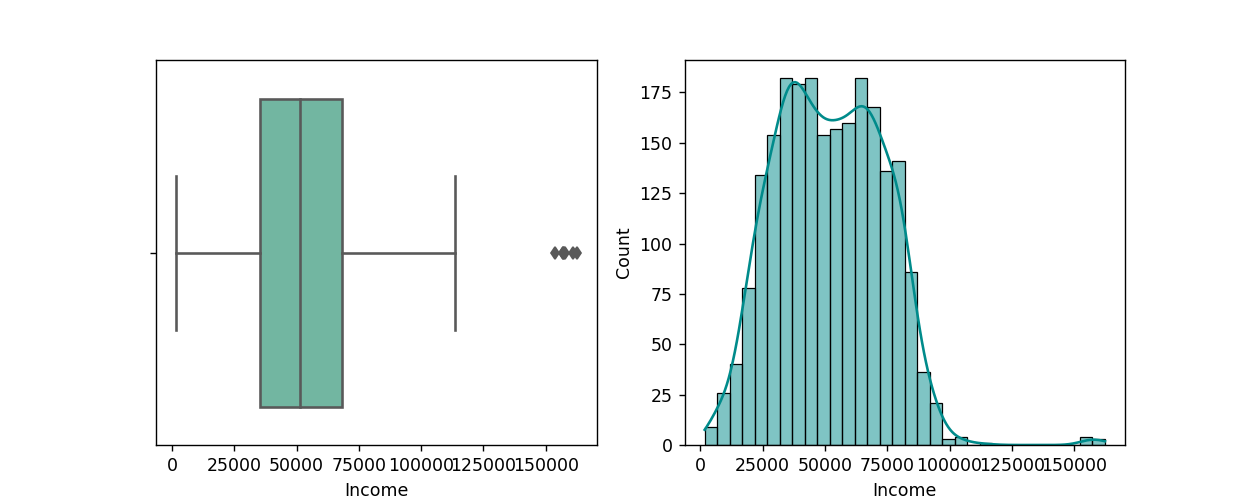

<IPython.core.display.Javascript object>


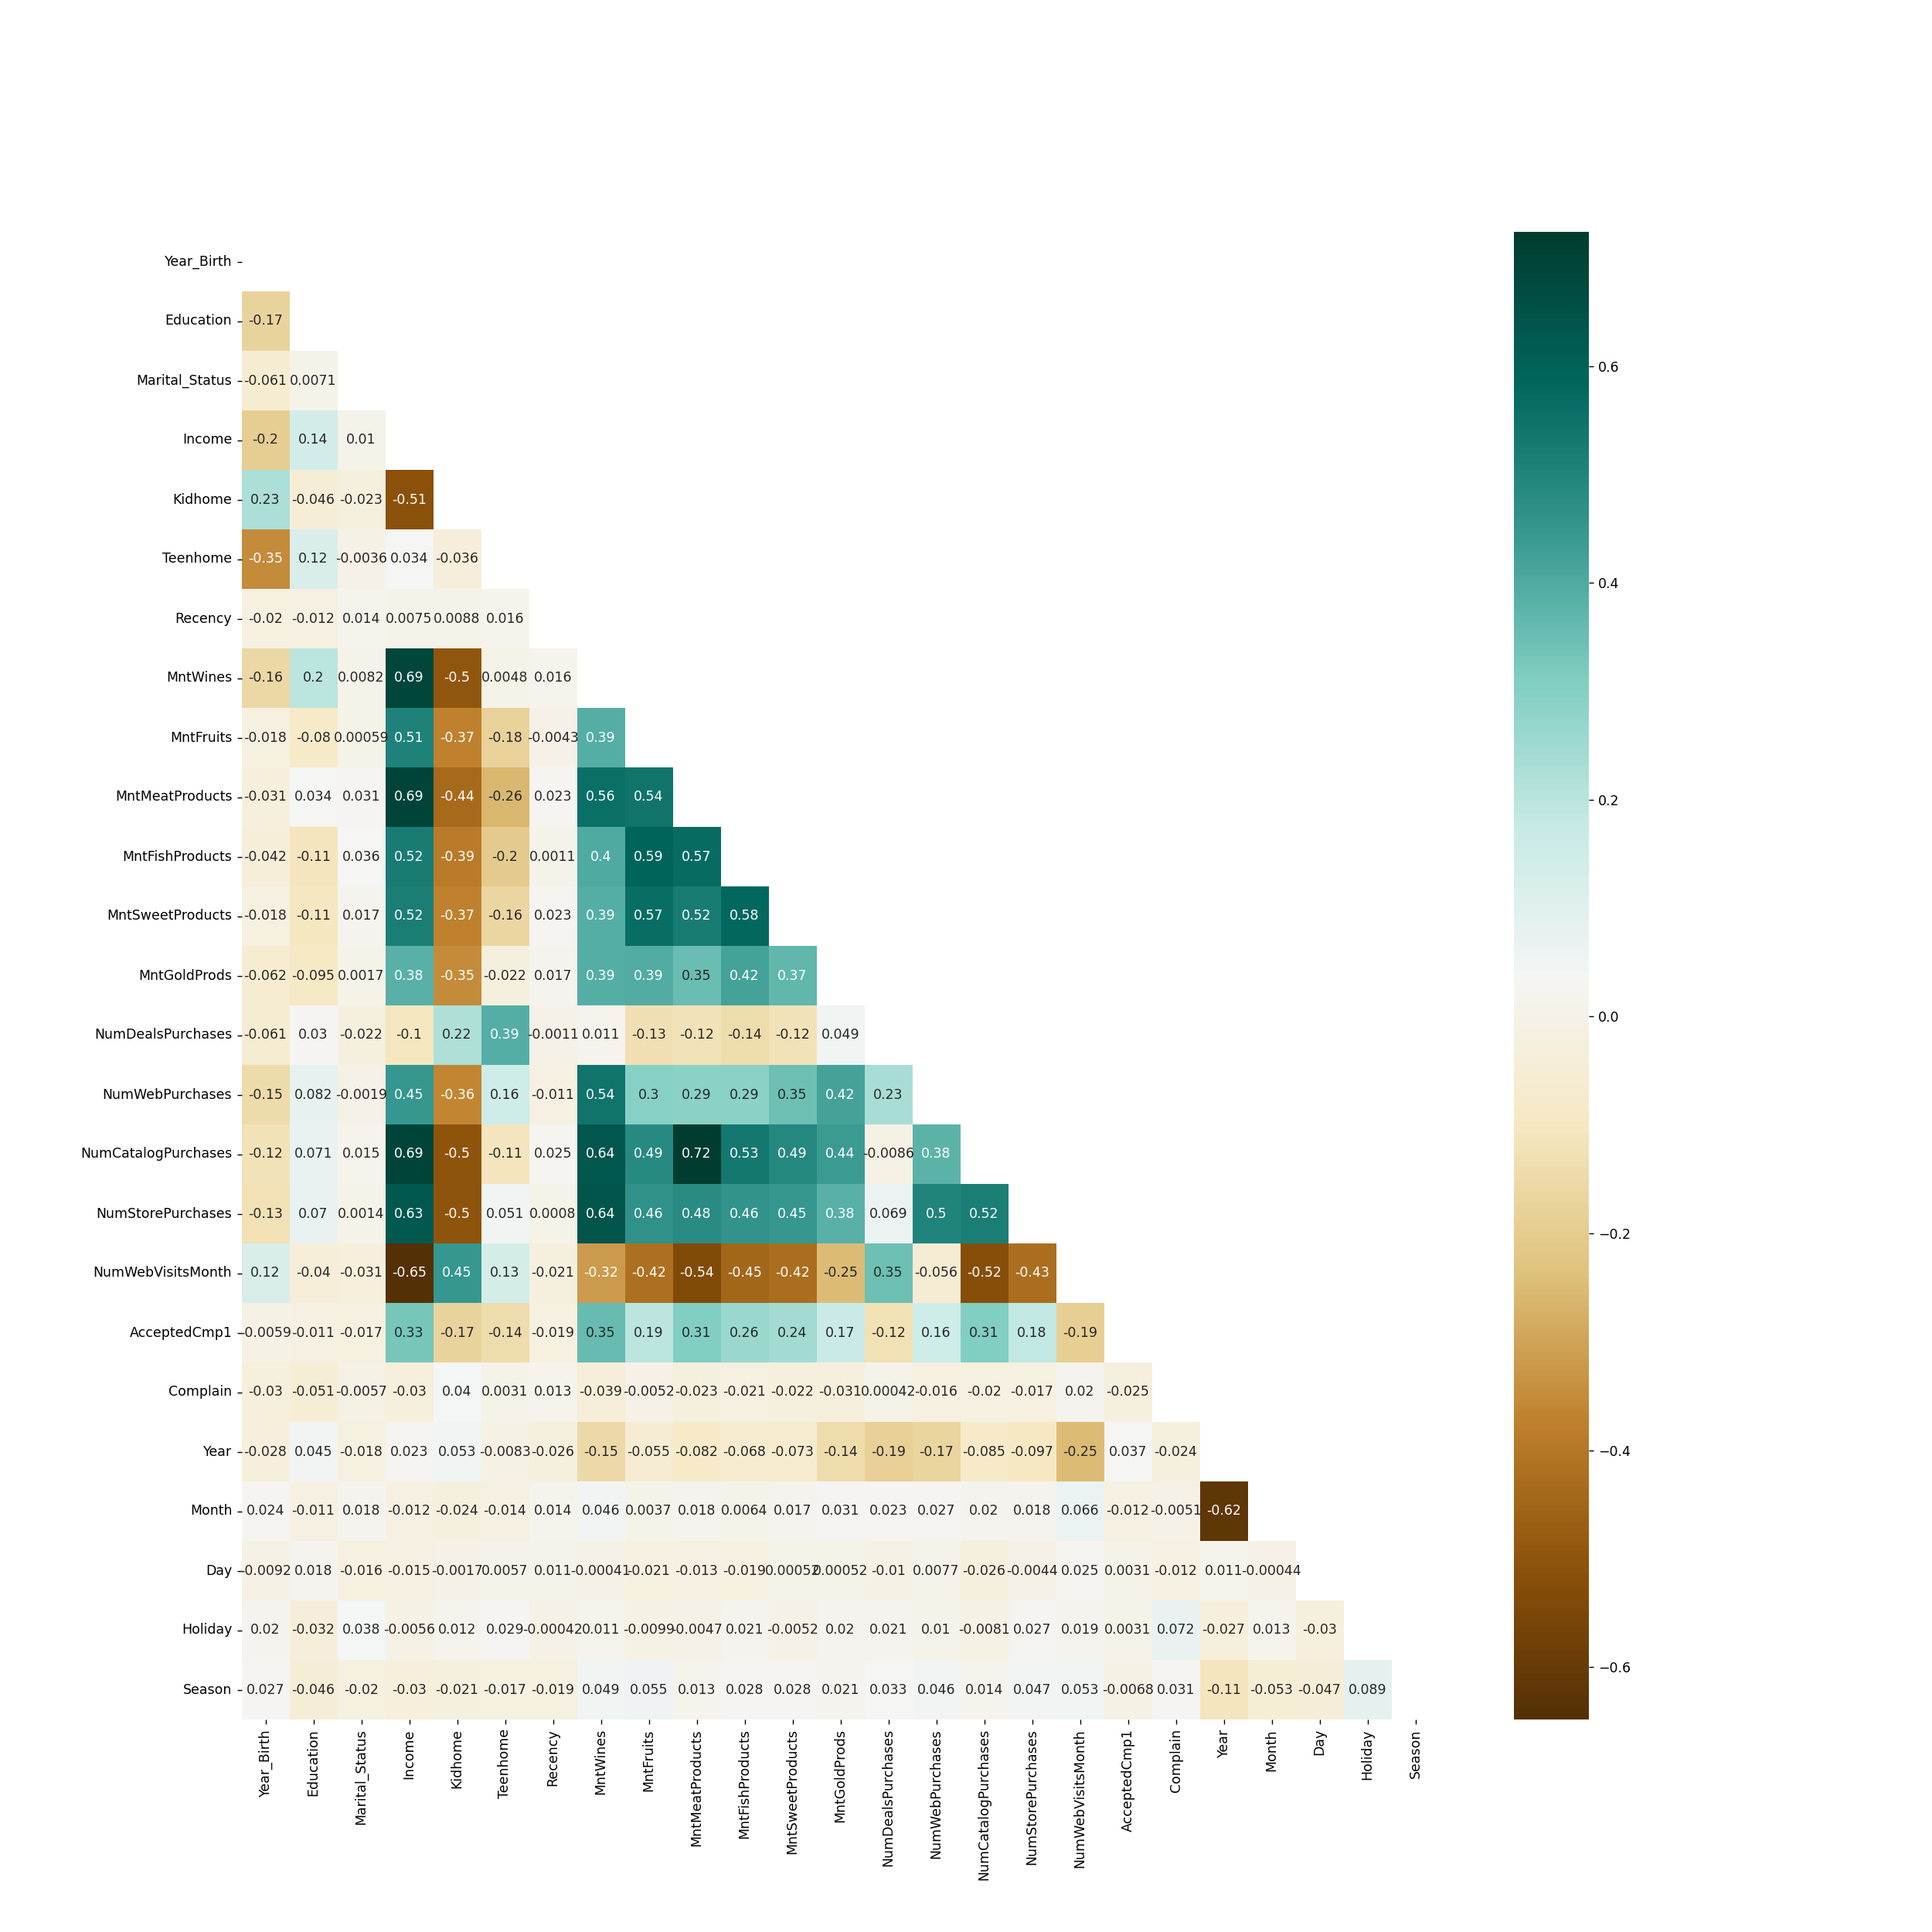



##################### Logistic Regression with Unscaled dataset ##################### 



shape of Datasets

X_train.shape, X_test.shape (1792, 24) (448, 24)
y_train.shape, y_test.shape (1792,) (448,) 

Value_counts in y_train and y_test
0.0    1677
1.0     115
Name: AcceptedCmp1, dtype: int64
0.0    419
1.0     29
Name: AcceptedCmp1, dtype: int64
         Current function value: 0.153365
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1767
Method:                           MLE   Df Model:                           24
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3564
Time:                        21:25:34   Log-Likelihood:                -274.83
converged:                      False   LL-Null:                       -427.04
Covariance Type:            n

C:\Users\singg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<IPython.core.display.Javascript object>


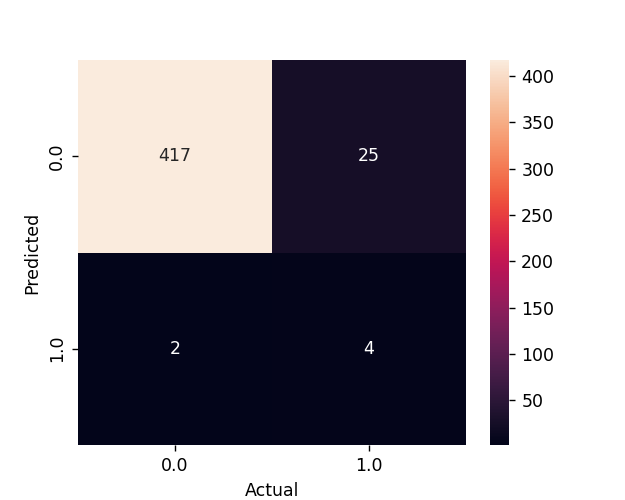

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862


#####################  Logistic Regression with scaled dataset ##################### 



shape of Datasets

X_train.shape, X_test.shape (1792, 24) (448, 24)
y_train.shape, y_test.shape (1792,) (448,) 

Value_counts in y_train and y_test
0.0    1677
1.0     115
Name: AcceptedCmp1, dtype: int64
0.0    419
1.0     29
Name: AcceptedCmp1, dtype: int64
         Current function value: 0.153365
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1767
Method:                           MLE   Df Model:                           24
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3564
Time:                        21:25:34   Log-Likelihood:                -274.83
converged:               

C:\Users\singg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<IPython.core.display.Javascript object>


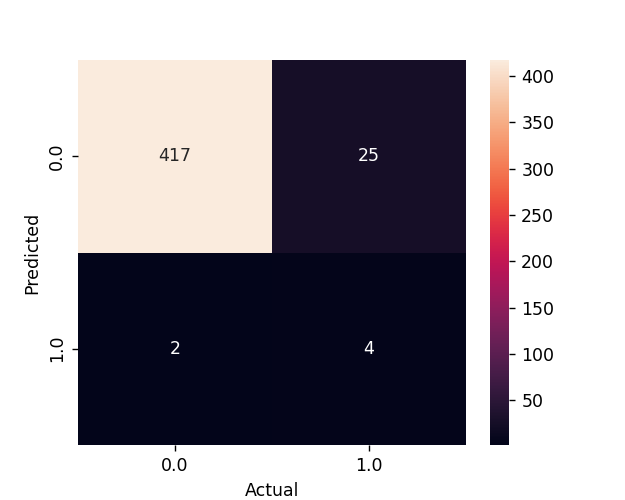

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862


#####################Attribute Selection


shape of Datasets

X_train.shape, X_test.shape (1792, 24) (448, 24)
y_train.shape, y_test.shape (1792,) (448,) 

Value_counts in y_train and y_test
0.0    1677
1.0     115
Name: AcceptedCmp1, dtype: int64
0.0    419
1.0     29
Name: AcceptedCmp1, dtype: int64



eleiminating  ['Complain'] 


Optimization terminated successfully.
         Current function value: 0.153598
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1768
Method:                           MLE   Df Model:                           23
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3554
Time:                        21:25:34   Log-Likelihood:                -275.25
co

<IPython.core.display.Javascript object>


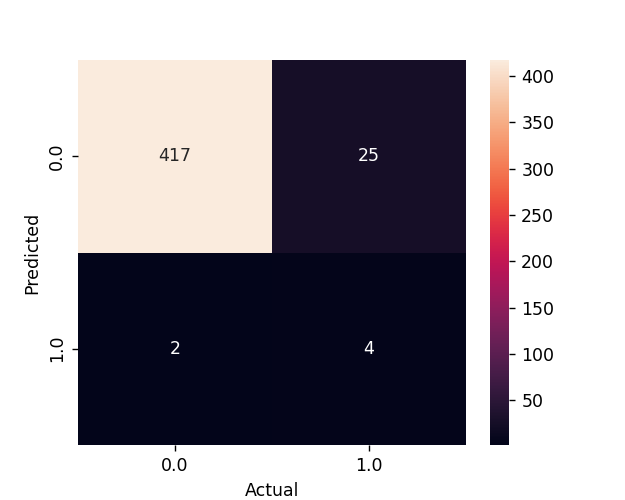

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday'] 


Optimization terminated successfully.
         Current function value: 0.153599
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1769
Method:                           MLE   Df Model:                           22
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3554
Time:                        21:25:35   Log-Likelihood:                -275.25
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 2.302e-51
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

<IPython.core.display.Javascript object>


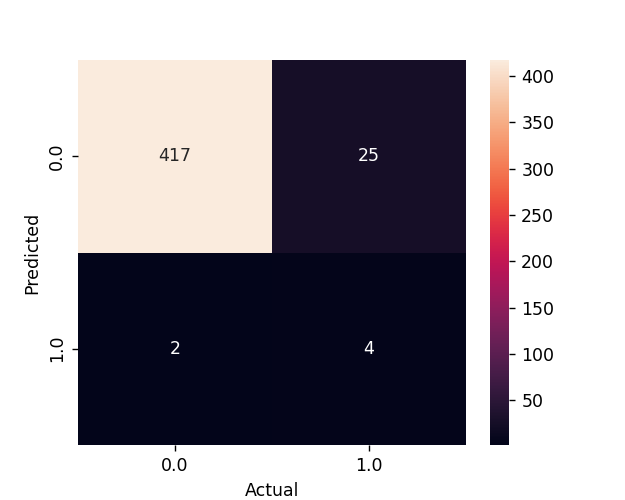

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome'] 


Optimization terminated successfully.
         Current function value: 0.153608
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1770
Method:                           MLE   Df Model:                           21
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3554
Time:                        21:25:35   Log-Likelihood:                -275.26
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 6.044e-52
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

<IPython.core.display.Javascript object>


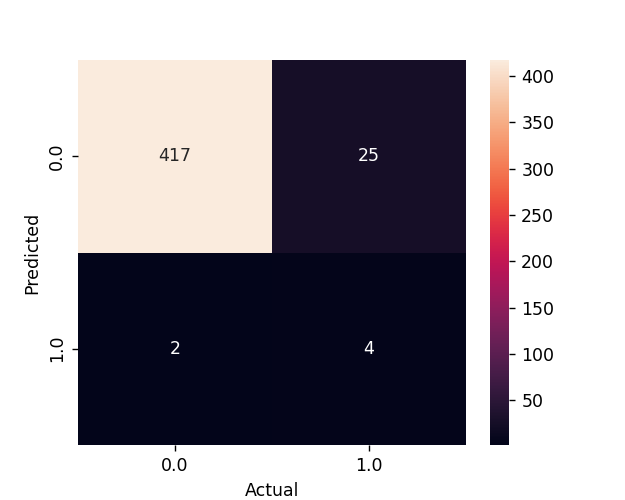

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts'] 


Optimization terminated successfully.
         Current function value: 0.153618
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1771
Method:                           MLE   Df Model:                           20
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3554
Time:                        21:25:35   Log-Likelihood:                -275.28
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 1.553e-52
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------

<IPython.core.display.Javascript object>


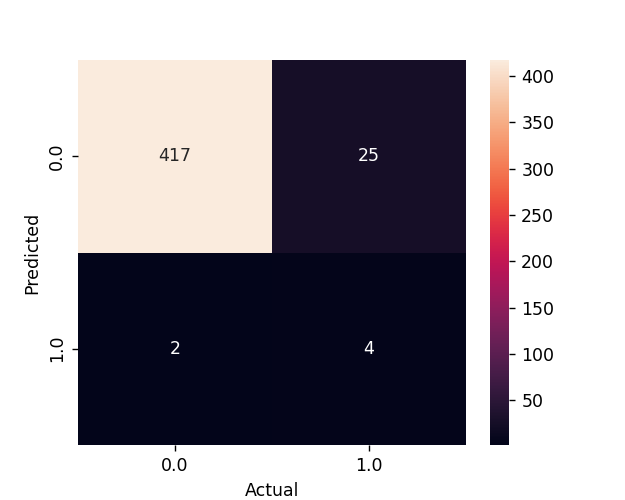

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases'] 


Optimization terminated successfully.
         Current function value: 0.153660
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1772
Method:                           MLE   Df Model:                           19
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3552
Time:                        21:25:35   Log-Likelihood:                -275.36
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 4.104e-53
                          coef    std err          z      P>|z|      [0.025      0.975]

<IPython.core.display.Javascript object>


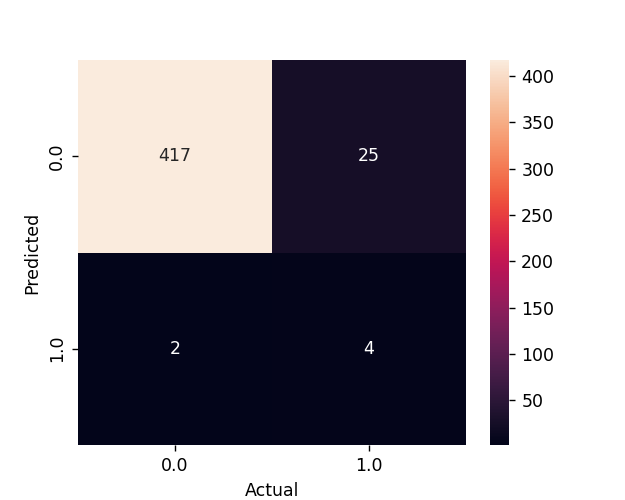

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day'] 


Optimization terminated successfully.
         Current function value: 0.153751
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1773
Method:                           MLE   Df Model:                           18
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3548
Time:                        21:25:35   Log-Likelihood:                -275.52
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 1.147e-53
                          coef    std err          z      P>|z|      [0.025     

<IPython.core.display.Javascript object>


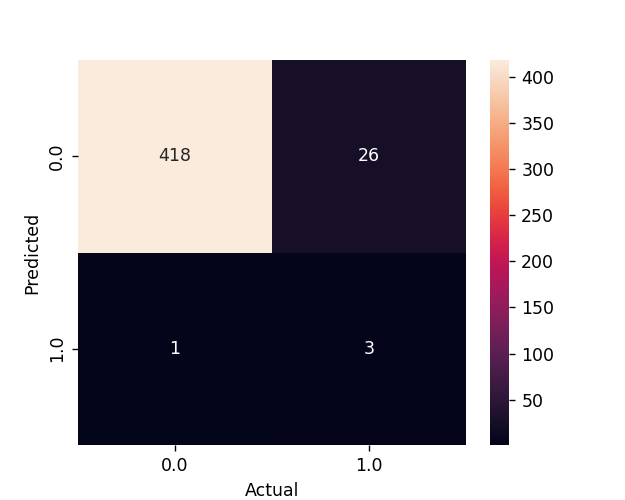

accuracy 0.9397321428571429
precision 0.75
recall 0.10344827586206896



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases'] 


Optimization terminated successfully.
         Current function value: 0.153894
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1774
Method:                           MLE   Df Model:                           17
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3542
Time:                        21:25:35   Log-Likelihood:                -275.78
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 3.405e-54
                          coef    std err          z      P>|z|      [0.0

<IPython.core.display.Javascript object>


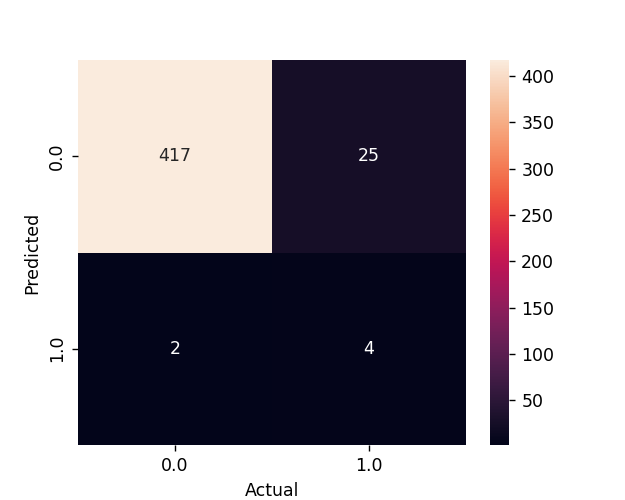

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth'] 


Optimization terminated successfully.
         Current function value: 0.154025
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1775
Method:                           MLE   Df Model:                           16
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3537
Time:                        21:25:35   Log-Likelihood:                -276.01
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 9.602e-55
                          coef    std err    

<IPython.core.display.Javascript object>


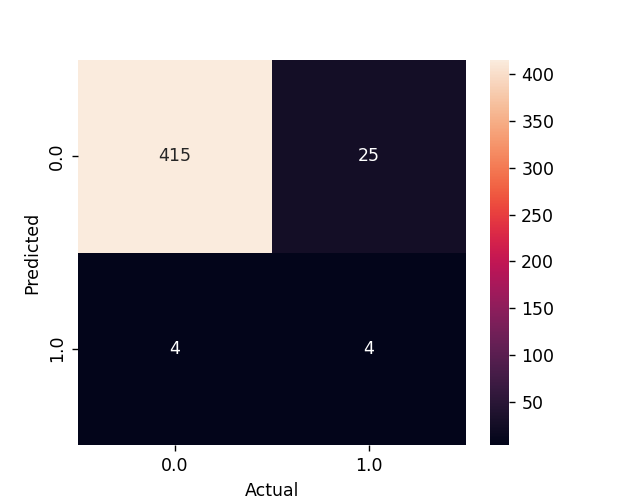

accuracy 0.9352678571428571
precision 0.5
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits'] 


Optimization terminated successfully.
         Current function value: 0.154254
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1776
Method:                           MLE   Df Model:                           15
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3527
Time:                        21:25:35   Log-Likelihood:                -276.42
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 3.108e-55
                          coef    std err      

<IPython.core.display.Javascript object>


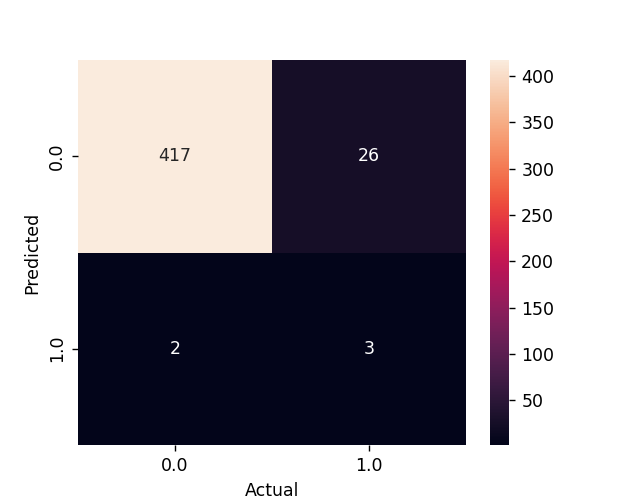

accuracy 0.9375
precision 0.6
recall 0.10344827586206896



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits', 'MntSweetProducts'] 


Optimization terminated successfully.
         Current function value: 0.154428
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1777
Method:                           MLE   Df Model:                           14
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3520
Time:                        21:25:36   Log-Likelihood:                -276.74
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 8.858e-56
                          coef    std e

<IPython.core.display.Javascript object>


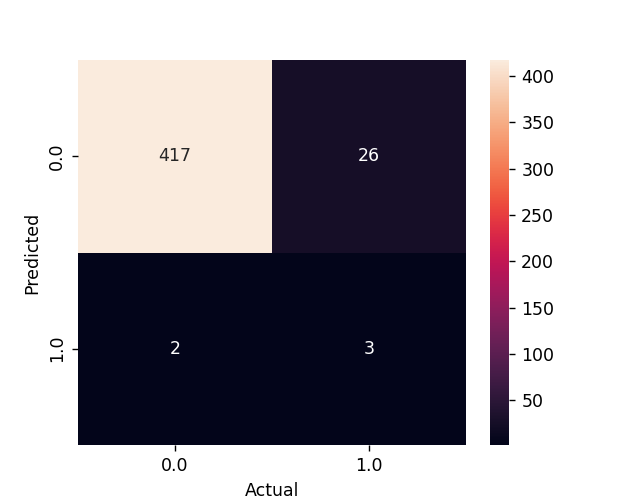

accuracy 0.9375
precision 0.6
recall 0.10344827586206896



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits', 'MntSweetProducts', 'Season'] 


Optimization terminated successfully.
         Current function value: 0.154740
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1778
Method:                           MLE   Df Model:                           13
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3507
Time:                        21:25:36   Log-Likelihood:                -277.29
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 3.082e-56
                          coe

<IPython.core.display.Javascript object>


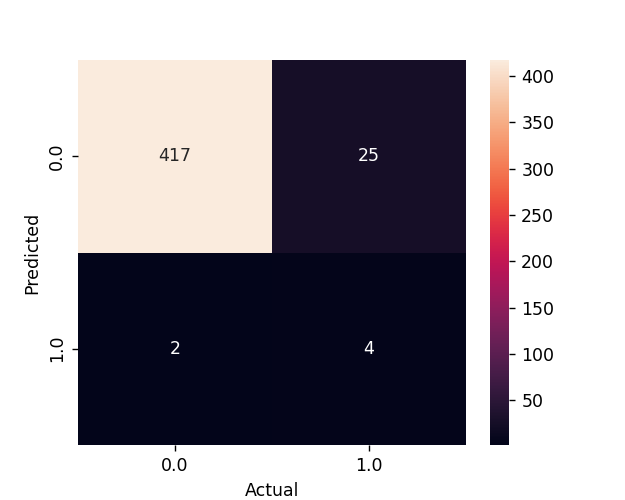

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits', 'MntSweetProducts', 'Season', 'Marital_Status'] 


Optimization terminated successfully.
         Current function value: 0.155161
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1779
Method:                           MLE   Df Model:                           12
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3489
Time:                        21:25:36   Log-Likelihood:                -278.05
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:           

<IPython.core.display.Javascript object>


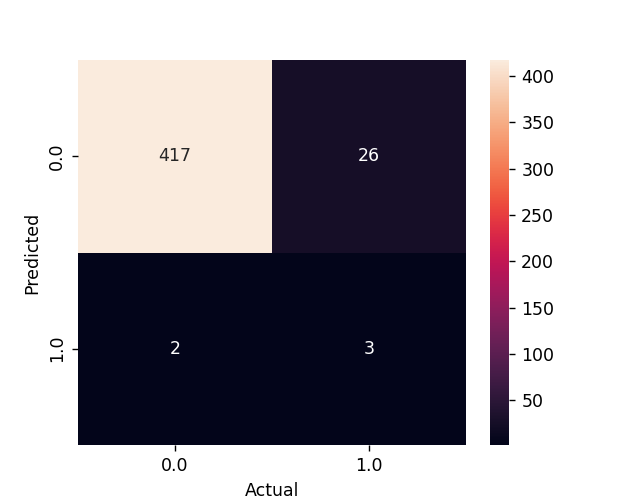

accuracy 0.9375
precision 0.6
recall 0.10344827586206896



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits', 'MntSweetProducts', 'Season', 'Marital_Status', 'MntGoldProds'] 


Optimization terminated successfully.
         Current function value: 0.155670
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1780
Method:                           MLE   Df Model:                           11
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3468
Time:                        21:25:36   Log-Likelihood:                -278.96
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 5.664

<IPython.core.display.Javascript object>


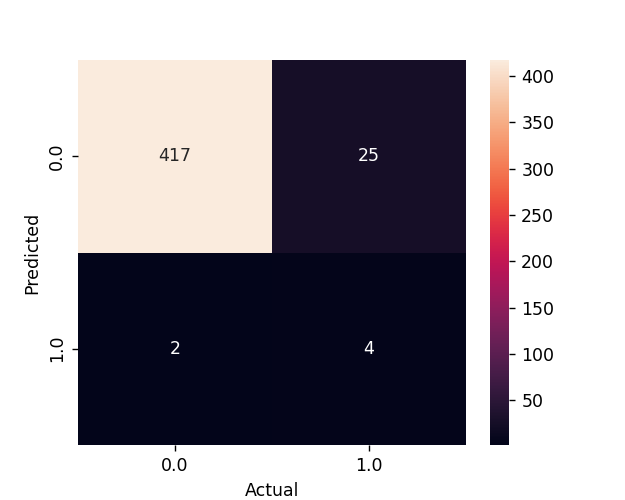

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits', 'MntSweetProducts', 'Season', 'Marital_Status', 'MntGoldProds', 'Recency'] 


Optimization terminated successfully.
         Current function value: 0.156182
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1781
Method:                           MLE   Df Model:                           10
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3446
Time:                        21:25:36   Log-Likelihood:                -279.88
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobus

<IPython.core.display.Javascript object>


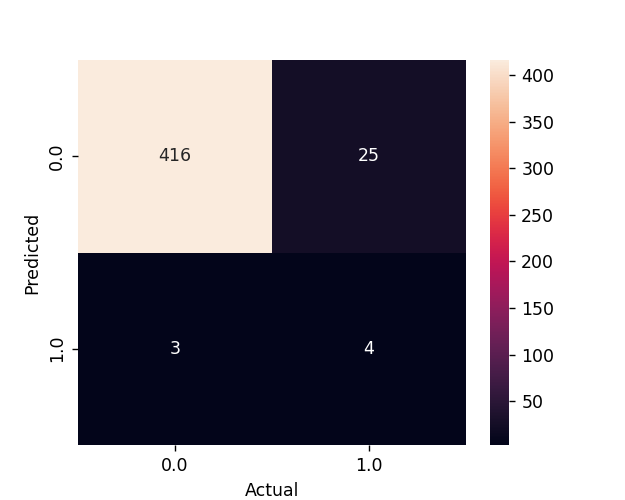

accuracy 0.9375
precision 0.5714285714285714
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits', 'MntSweetProducts', 'Season', 'Marital_Status', 'MntGoldProds', 'Recency', 'NumWebVisitsMonth'] 


Optimization terminated successfully.
         Current function value: 0.157950
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1782
Method:                           MLE   Df Model:                            9
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3372
Time:                        21:25:36   Log-Likelihood:                -283.05
converged:                       True   LL-Null:                       -427.04
Covariance Type:           

<IPython.core.display.Javascript object>


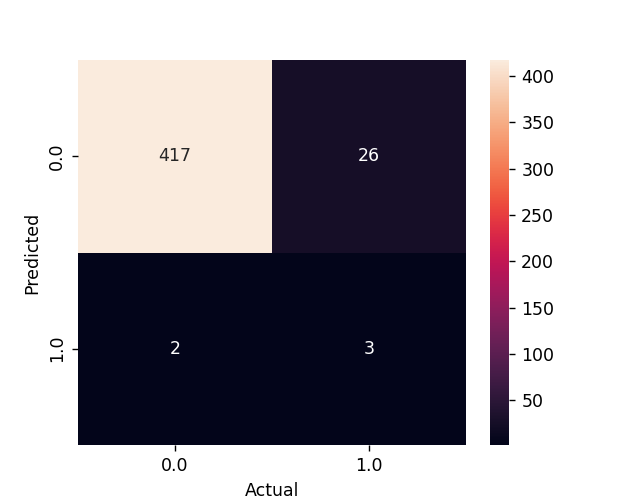

accuracy 0.9375
precision 0.6
recall 0.10344827586206896



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits', 'MntSweetProducts', 'Season', 'Marital_Status', 'MntGoldProds', 'Recency', 'NumWebVisitsMonth', 'Month'] 


Optimization terminated successfully.
         Current function value: 0.158567
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1783
Method:                           MLE   Df Model:                            8
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3346
Time:                        21:25:36   Log-Likelihood:                -284.15
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonro

<IPython.core.display.Javascript object>


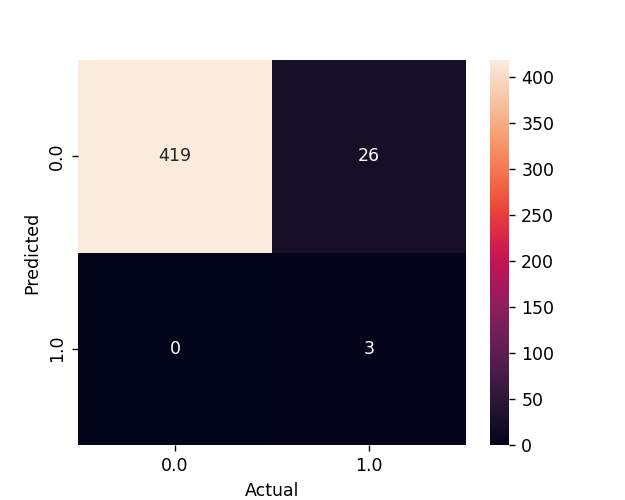

accuracy 0.9419642857142857
precision 1.0
recall 0.10344827586206896



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'Day', 'NumDealsPurchases', 'Year_Birth', 'MntFruits', 'MntSweetProducts', 'Season', 'Marital_Status', 'MntGoldProds', 'Recency', 'NumWebVisitsMonth', 'Month', 'NumCatalogPurchases'] 


Optimization terminated successfully.
         Current function value: 0.159365
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1784
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3312
Time:                        21:25:36   Log-Likelihood:                -285.58
converged:                       True   LL-Null:                       -427.0

<IPython.core.display.Javascript object>


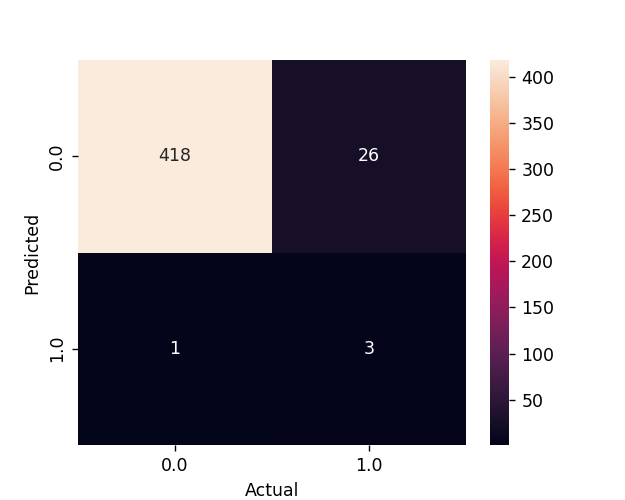

accuracy 0.9397321428571429
precision 0.75
recall 0.10344827586206896


##################### Delete Year, complain


shape of Datasets

X_train.shape, X_test.shape (1792, 24) (448, 24)
y_train.shape, y_test.shape (1792,) (448,) 

Value_counts in y_train and y_test
0.0    1677
1.0     115
Name: AcceptedCmp1, dtype: int64
0.0    419
1.0     29
Name: AcceptedCmp1, dtype: int64



eleiminating  ['Complain'] 


Optimization terminated successfully.
         Current function value: 0.153598
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1768
Method:                           MLE   Df Model:                           23
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3554
Time:                        21:25:37   Log-Likelihood:                -275.25
converged:   

<IPython.core.display.Javascript object>


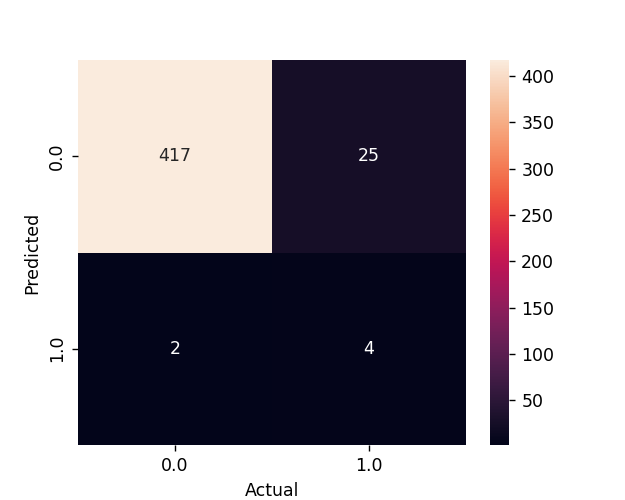

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday'] 


Optimization terminated successfully.
         Current function value: 0.153599
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1769
Method:                           MLE   Df Model:                           22
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3554
Time:                        21:25:37   Log-Likelihood:                -275.25
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 2.302e-51
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

<IPython.core.display.Javascript object>


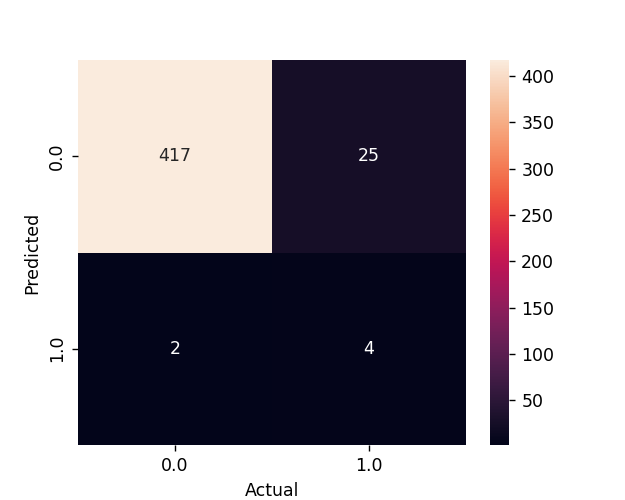

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome'] 


Optimization terminated successfully.
         Current function value: 0.153608
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1770
Method:                           MLE   Df Model:                           21
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3554
Time:                        21:25:37   Log-Likelihood:                -275.26
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 6.044e-52
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

<IPython.core.display.Javascript object>


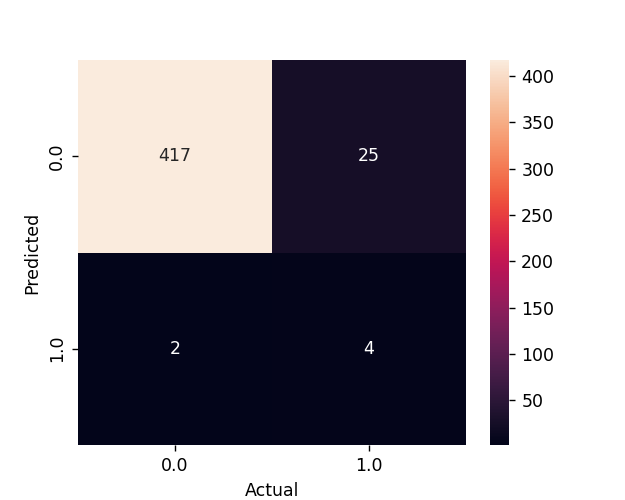

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'Day'] 


Optimization terminated successfully.
         Current function value: 0.153694
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1771
Method:                           MLE   Df Model:                           20
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3550
Time:                        21:25:37   Log-Likelihood:                -275.42
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 1.767e-52
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

<IPython.core.display.Javascript object>


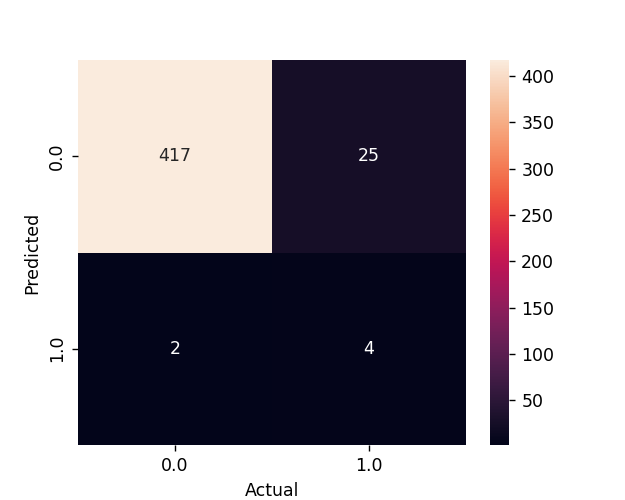

accuracy 0.9397321428571429
precision 0.6666666666666666
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'Day', 'Season'] 


Optimization terminated successfully.
         Current function value: 0.153955
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1772
Method:                           MLE   Df Model:                           19
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3539
Time:                        21:25:37   Log-Likelihood:                -275.89
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 6.761e-53
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------

<IPython.core.display.Javascript object>


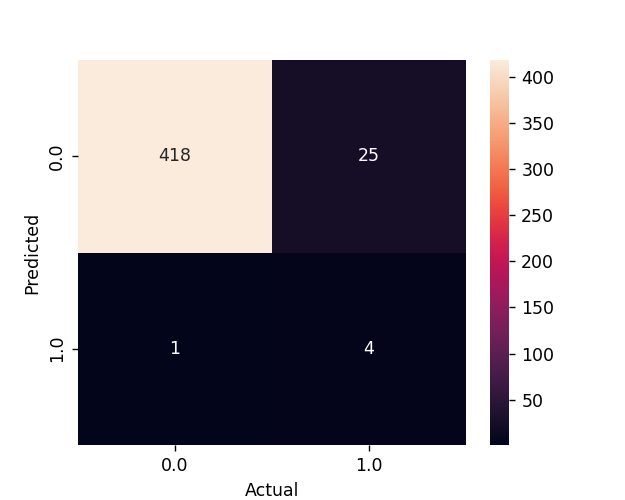

accuracy 0.9419642857142857
precision 0.8
recall 0.13793103448275862



eleiminating  ['Complain', 'Holiday', 'Kidhome', 'Day', 'Season', 'Year'] 


Optimization terminated successfully.
         Current function value: 0.159518
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1773
Method:                           MLE   Df Model:                           18
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3306
Time:                        21:25:37   Log-Likelihood:                -285.86
converged:                       True   LL-Null:                       -427.04
Covariance Type:            nonrobust   LLR p-value:                 2.015e-49
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

<IPython.core.display.Javascript object>


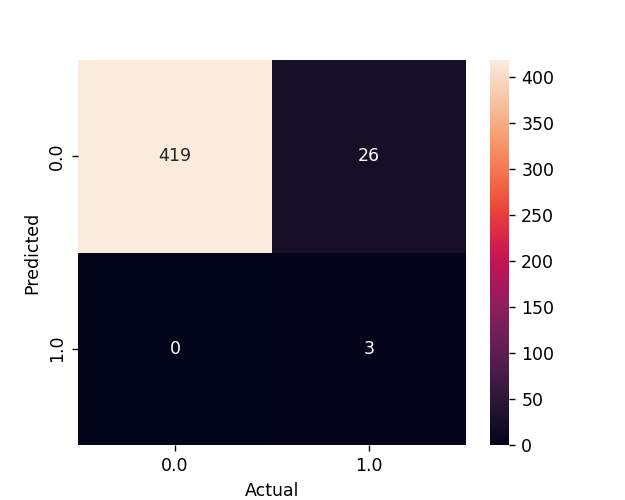

accuracy 0.9419642857142857
precision 1.0
recall 0.10344827586206896
[const]      exp(-6.489873137331816) is 0.001519
[Year_Birth]      exp(0.78155844279559) is 2.184875
[Education]      exp(-0.9008192570739021) is 0.406237
[Marital_Status]      exp(-0.8408819198591008) is 0.43133
[Income]      exp(6.536090996595613) is 689.58571
[Teenhome]      exp(-1.4653305409063764) is 0.231002
[Recency]      exp(-0.5459137844400485) is 0.579312
[MntWines]      exp(3.435663836997593) is 31.052019
[MntFruits]      exp(-0.3936242884549619) is 0.674607
[MntMeatProducts]      exp(-0.22087080106088913) is 0.80182
[MntFishProducts]      exp(1.3264420182559764) is 3.767614
[MntSweetProducts]      exp(0.280029639176141) is 1.323169
[MntGoldProds]      exp(0.6830721843082683) is 1.979951
[NumDealsPurchases]      exp(-1.267757002383729) is 0.281462
[NumWebPurchases]      exp(2.037513696400091) is 7.671512
[NumCatalogPurchases]      exp(1.9418851427053905) is 6.971882
[NumStorePurchases]      exp(-0.316154494

<IPython.core.display.Javascript object>


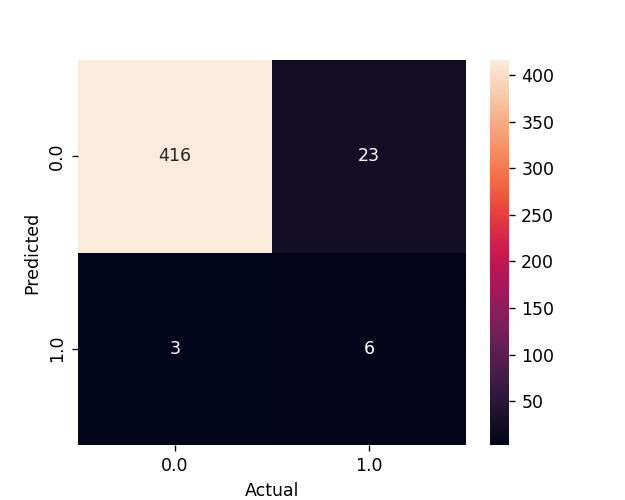

accuracy 0.9419642857142857
precision 0.6666666666666666
recall 0.20689655172413793


##################### Support Vector Machine with all variables


shape of Datasets

X_train.shape, X_test.shape (1792, 24) (448, 24)
y_train.shape, y_test.shape (1792,) (448,) 

Value_counts in y_train and y_test
0.0    1677
1.0     115
Name: AcceptedCmp1, dtype: int64
0.0    419
1.0     29
Name: AcceptedCmp1, dtype: int64


<IPython.core.display.Javascript object>


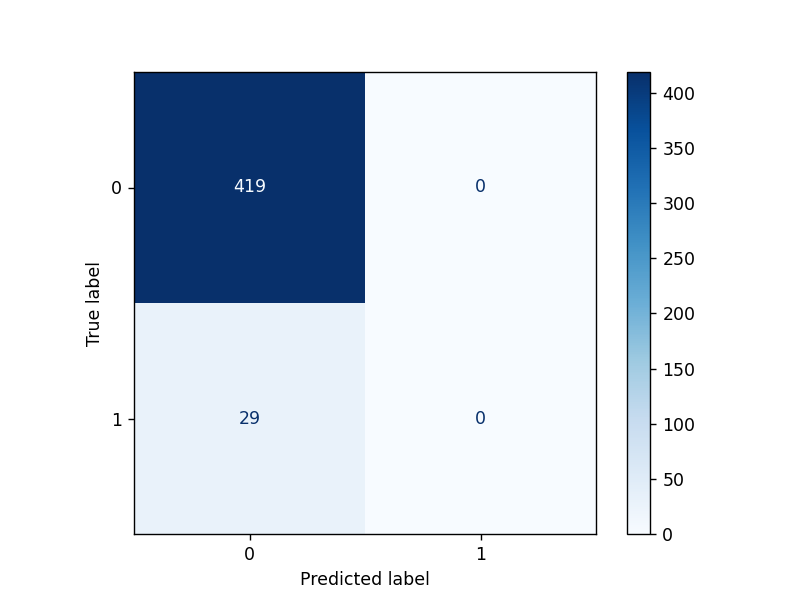

[[419   0]
 [ 29   0]]
accuracy 0.9352678571428571
precision 0.0
recall 0.0


C:\Users\singg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


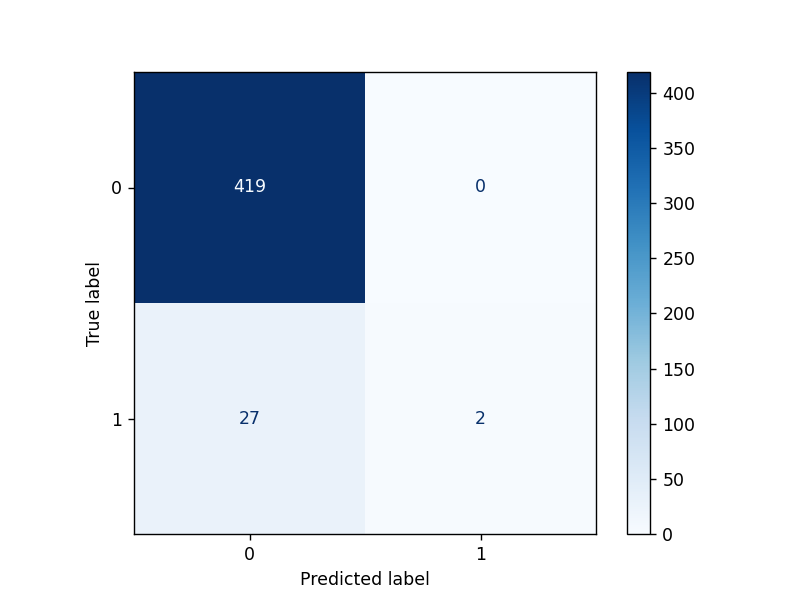

[[419   0]
 [ 27   2]]
accuracy 0.9397321428571429
precision 1.0
recall 0.06896551724137931


<IPython.core.display.Javascript object>


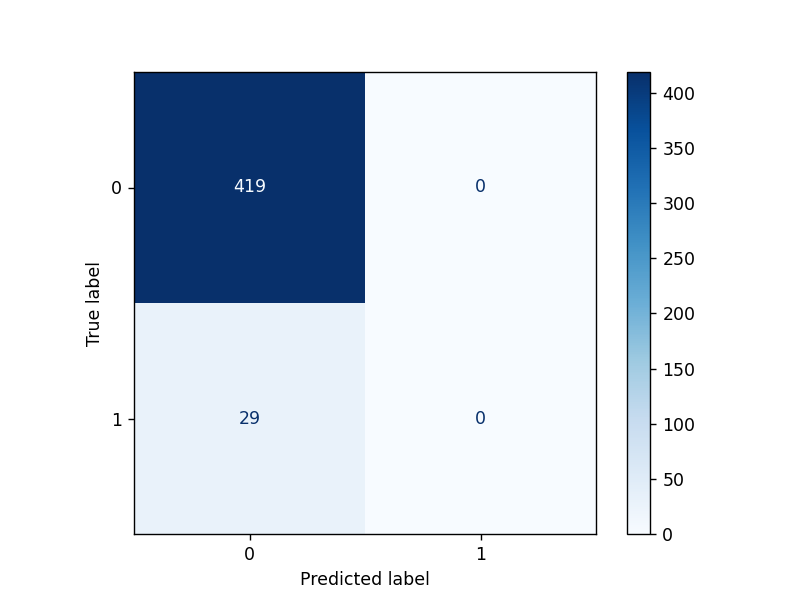

[[419   0]
 [ 29   0]]
accuracy 0.9352678571428571
precision 0.0
recall 0.0


##################### Support Vector Machine with variables p-value lower than 0.05


shape of Datasets

X_train.shape, X_test.shape (1792, 7) (448, 7)
y_train.shape, y_test.shape (1792,) (448,) 

Value_counts in y_train and y_test
0.0    1677
1.0     115
Name: AcceptedCmp1, dtype: int64
0.0    419
1.0     29
Name: AcceptedCmp1, dtype: int64


C:\Users\singg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


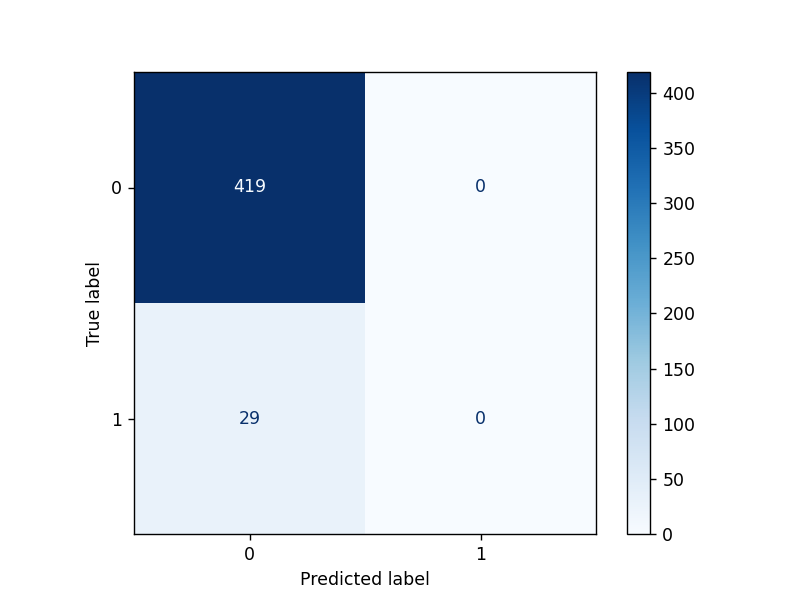

[[419   0]
 [ 29   0]]
accuracy 0.9352678571428571
precision 0.0
recall 0.0


C:\Users\singg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


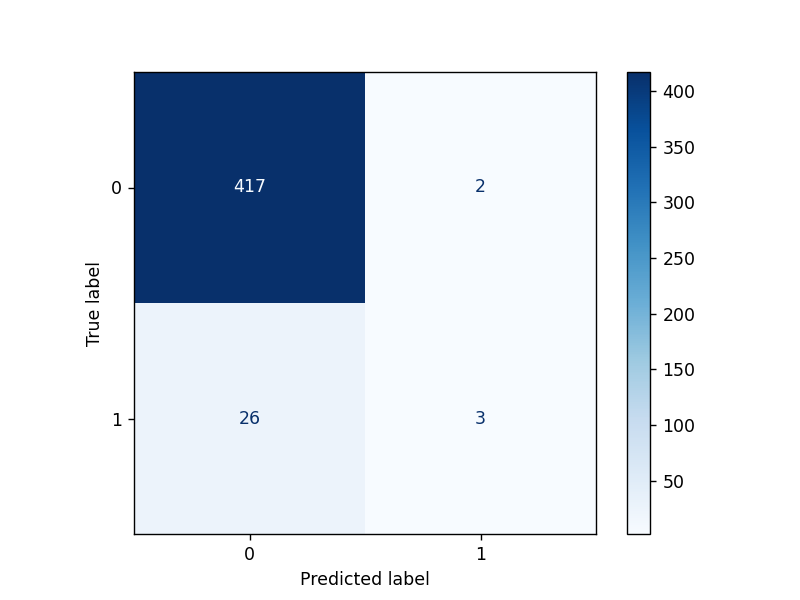

[[417   2]
 [ 26   3]]
accuracy 0.9375
precision 0.6
recall 0.10344827586206896


<IPython.core.display.Javascript object>


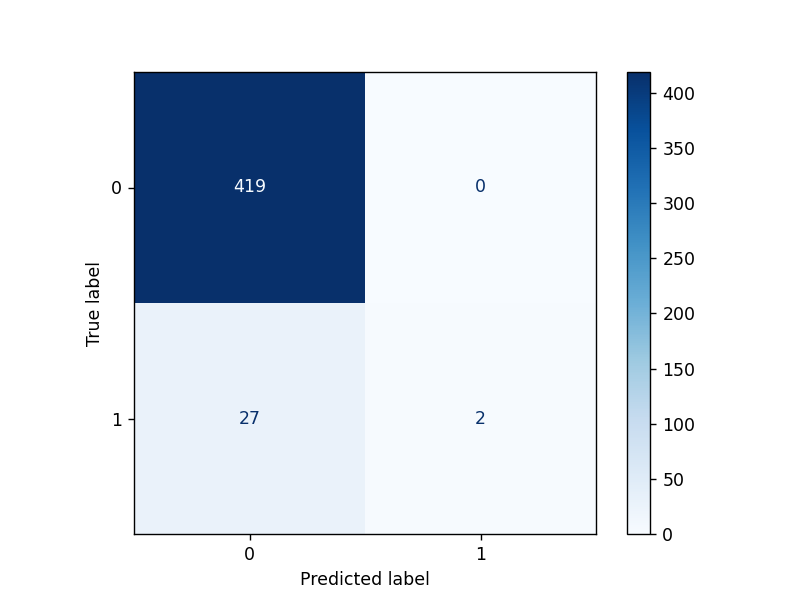

[[419   0]
 [ 27   2]]
accuracy 0.9397321428571429
precision 1.0
recall 0.06896551724137931


In [20]:
if __name__ == "__main__":
    ############ Data loading
    df = pd.read_excel("marketing_campaign.xlsx")
    ############ Check Oigjal Dataset
    exp_df(df, 1)
    ########### Convert, clean
    con_date(df)
    exp_cat(df)
    exp_cont(df)
    df = clean_data(df)
    exp_df(df, 2)
    ########## KNN imputation, Datasets and Minmaxscaler
    imputed_df = Knn_imp(df)
    exp_df(imputed_df, 3)
    ch_corr(imputed_df)
    ######### Log Model for understanding attributes  
    ## Unscaled
    print("\n\n##################### Logistic Regression with Unscaled dataset ##################### \n")
    X_train, X_test, y_train, y_test = train_test_scal(imputed_df, 0)
    log_reg = model_log(X_train, y_train)
    cal_log(log_reg)
    X_test= sm.add_constant(X_test)
    evaluate_models(X_train, X_test, y_test, log_reg, sep=1)
    ## scaled
    print("\n\n#####################  Logistic Regression with scaled dataset ##################### \n")
    X_train, X_test, y_train, y_test = train_test_scal(imputed_df, 1)
    log_reg = model_log(X_train, y_train)
    cal_log(log_reg)   
    X_test= sm.add_constant(X_test)
    evaluate_models(X_train, X_test, y_test, log_reg, sep=1)
    ######### Selecting attributes 
    print("\n\n#####################Attribute Selection")
    X_train, X_test, y_train, y_test = train_test_scal(imputed_df, 1)
    d_list = ["Complain", "Holiday","Kidhome", "MntMeatProducts", "NumStorePurchases", "Day", \
              "NumDealsPurchases", "Year_Birth", "MntFruits","MntSweetProducts", \
              "Season","Marital_Status","MntGoldProds","Recency","NumWebVisitsMonth","Month",\
              "NumCatalogPurchases"]
    log_reg, X_train, X_test, y_test = backward_sel(X_train, X_test, y_train, y_test, d_list)

    print("\n\n##################### Delete Year, complain")
    X_train, X_test, y_train, y_test = train_test_scal(imputed_df, 1)
    d_list = ["Complain", "Holiday","Kidhome","Day","Season","Year"]
    log_reg, X_train, X_test, y_test = backward_sel(X_train, X_test, y_train, y_test, d_list)
    cal_log(log_reg)
    
    ######### Threshold
    print("\n\n##################### change threshold")
    evaluate_models(X_train, X_test, y_test, log_reg, sep=1, th=0.35)
    
       
    ######### SVM
    print("\n\n##################### Support Vector Machine with all variables")
    X_train, X_test, y_train, y_test = train_test_scal(imputed_df, 1)
    svm_mo = model_svm(X_train, y_train)
    evaluate_models(X_train, X_test, y_test, svm_mo, sep=2)  
    
    
    ######### SVM
    print("\n\n##################### Support Vector Machine with variables p-value lower than 0.05")
    d_list = ["Complain", "Holiday","Kidhome", "MntMeatProducts", "NumStorePurchases", "Day", \
              "NumDealsPurchases", "Year_Birth", "MntFruits","MntSweetProducts", \
              "Season","Marital_Status","MntGoldProds","Recency","NumWebVisitsMonth","Month",\
              "NumCatalogPurchases"]
    t_imputed_df = imputed_df.copy()
    t_imputed_df.drop(columns=list(d_list), axis=1, inplace=True)
    X_train, X_test, y_train, y_test = train_test_scal(t_imputed_df, 1)
    
    svm_mo = model_svm(X_train, y_train)
    evaluate_models(X_train, X_test, y_test, svm_mo, sep=2)  


In [23]:
d_list = ["Complain", "Holiday","Kidhome","Day","Season","Year"]
t_imputed_df = imputed_df.copy()
t_imputed_df.drop(columns=list(d_list), axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_scal(t_imputed_df, 1)
svm_mo = svm.SVC(kernel='linear')
svm_mo.fit(X_train, y_train)
pred = svm_mo.predict(X_test)
svm_mo.coef_



shape of Datasets

X_train.shape, X_test.shape (1792, 18) (448, 18)
y_train.shape, y_test.shape (1792,) (448,) 

Value_counts in y_train and y_test
0.0    1677
1.0     115
Name: AcceptedCmp1, dtype: int64
0.0    419
1.0     29
Name: AcceptedCmp1, dtype: int64


array([[ 3.05345305e-05, -1.96220255e-04,  3.67353212e-05,
         5.03979492e-04, -3.45779686e-05, -1.13474566e-04,
         2.90209026e-04, -5.79191443e-05, -2.10173455e-04,
        -1.58465098e-04,  1.20657072e-04, -1.72175572e-04,
        -1.13709158e-03,  3.30499169e-04,  1.07252381e-03,
         4.91811816e-05,  6.48434210e-04, -2.03210961e-04]])

In [24]:
X_train.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Month'],
      dtype='object')